In [1]:
%load_ext autoreload
%autoreload 2
import fidimag
import numpy as np
nx = 25
ny = nz = 1
d = 2.0

Ms = 3.84e5  # saturation magnetisation (A/m)
A = 8.78e-12  # exchange energy constant (J/m)
D = 1.58e-3  # Dzyaloshinkii-Moriya energy constant (J/m**2)
H = np.array([0.0, 0.0, 0.2/fidimag.common.constant.mu_0])
alpha = 1  # Gilbert damping
gamma = 2.211e5  # gyromagnetic ration (m/As)

Evolution of isolated magnetic dipole

In [3]:
mesh = fidimag.common.CuboidMesh(nx=1, ny=1, nz=1, dx=d, dy=d, dz=d, unit_length=1e-9)

sim = fidimag.micro.Sim(mesh, name="SingleSpinNoDamping")
sim.alpha = 0.0

def m_init(pos):
    x, y, z = pos
    return np.random.uniform(-1, 1, 3)

np.random.seed(0)
sim.set_m(m_init, normalise=True)
sim.set_Ms(Ms)
sim.add(fidimag.micro.Zeeman(H))
ts = np.linspace(0, 2e-9, 200)
for t in ts:
    sim.driver.run_until(t)
    sim.save_vtk()
print("Done")


# High Damping

mesh = fidimag.common.CuboidMesh(nx=1, ny=1, nz=1, dx=d, dy=d, dz=d, unit_length=1e-9)
sim = fidimag.micro.Sim(mesh, name="SingleSpinDamped")
sim.alpha = 1000
np.random.seed(0)
sim.set_m(m_init, normalise=True)
sim.set_Ms(Ms)
sim.add(fidimag.micro.Zeeman(H))
ts = np.linspace(0, 2e-9, 200)
for t in ts:
    sim.driver.run_until(t)
    sim.save_vtk()
print("Done")

Done
Done


# Zeeman Interaction

In [5]:
mesh = fidimag.common.CuboidMesh(nx=nx, ny=ny, nz=nz, dx=d, dy=d, dz=d, unit_length=1e-9)
sim = fidimag.micro.Sim(mesh, name="ZeemanHighDamping")
sim.alpha = 0.5

def m_init(pos):
    x, y, z = pos
    return np.random.uniform(-1, 1, 3)

np.random.seed(0)
sim.set_m(m_init, normalise=True)
sim.set_Ms(Ms)
sim.add(fidimag.micro.Zeeman(H))
ts = np.linspace(0, 2e-9, 200)
for t in ts:
    sim.driver.run_until(t)
    sim.save_vtk()
print("Done")


# High Damping

mesh = fidimag.common.CuboidMesh(nx=nx, ny=ny, nz=nz, dx=d, dy=d, dz=d, unit_length=1e-9)
sim = fidimag.micro.Sim(mesh, name="ZeemanLowDamping")
sim.alpha = 0.1    
np.random.seed(0)
sim.set_m(m_init, normalise=True)
sim.set_Ms(Ms)
sim.add(fidimag.micro.Zeeman(H))
ts = np.linspace(0, 2e-9, 200)
for t in ts:
    sim.driver.run_until(t)
    sim.save_vtk()
print("Done")

Done
Done


In [54]:
!rm -rf Anisotropy_vtks/
mesh = fidimag.common.CuboidMesh(nx=25, ny=1, nz=nz, dx=d, dy=d, dz=d, unit_length=1e-9)
sim = fidimag.micro.Sim(mesh, name="Anisotropy")
sim.alpha = 0.1

def m_init(pos):
    x, y, z = pos
    return np.random.uniform(-1, 1, 3)

np.random.seed(0)
sim.set_m(m_init, normalise=True)
sim.set_Ms(Ms)
sim.add(fidimag.micro.UniaxialAnisotropy(1e5, axis=(0, 0, 1)))
ts = np.linspace(0, 2e-9, 200)
for t in ts:
    sim.driver.run_until(t)
    sim.save_vtk()
print("Done")

Done


# Exchange Interaction

In [ ]:
mesh = fidimag.common.CuboidMesh(nx=nx, ny=ny, nz=nz, dx=d, dy=d, dz=d, unit_length=1e-9)
sim = fidimag.micro.Sim(mesh, name="Exchange")
sim.alpha = 0.25

def m_init(pos):
    x, y, z = pos
    if x == d/2.0:
        return (0, 0, 1)
    elif x == nx*d - d/2.0:
        return (0, 0, 1)
    else:
        return np.random.uniform(-1, 1, 3)

def pin(pos):
    x, y, z = pos
    if x == d/2.0:
        return 1
    elif x == nx*d - d/2.0:
        return 1
    else:
        return 0
    

sim.set_m(m_init, normalise=True)
sim.set_pins(pin)
sim.set_Ms(Ms)
sim.add(fidimag.micro.UniformExchange(3*A))
ts = np.linspace(0, 0.1e-9, 200)
for t in ts:
    sim.driver.run_until(t)
    sim.save_vtk()
print('Done')

# Dzyaloshinskii-Moriya Interaction


In [ ]:
nx

In [7]:
mesh = fidimag.common.CuboidMesh(nx=nx, ny=ny, nz=nz, dx=d, dy=d, dz=d, unit_length=1e-9)
sim = fidimag.micro.Sim(mesh, name="DMI")
sim.alpha = 0.25

def m_init(pos):
    x, y, z = pos
    if x == d/2.0:
        return (0, 0, 1)
    elif x == nx*d - d/2.0:
        return (0, 0, 1)
    else:
        return np.random.uniform(-1, 1, 3)

def pin(pos):
    x, y, z = pos
    if x == d/2.0:
        return 1
    else:
        return 0
    

sim.set_m(m_init, normalise=True)
sim.set_pins(pin)
sim.set_Ms(Ms)
sim.add(fidimag.micro.DMI(D, dmi_type='bulk'))
ts = np.linspace(0, 0.1e-9, 200)
for t in ts:
    sim.driver.run_until(t)
    sim.save_vtk()
print('Done')

Done


In [ ]:
import mayavi

In [1]:
%gui qt

In [3]:
from mayavi import mlab

In [25]:
!rm -rf Demag_vtks/

np.random.seed(0)
A=1.3e-11
Ms=8.6e5
nx = ny = 40
d = 5

L = nx * d / 2

mesh = fidimag.common.CuboidMesh(nx=nx, ny=ny, nz=1, dx=d, dy=d, dz=d, x0=-L, y0=-L, unit_length=1e-9)
sim = fidimag.micro.Sim(mesh, name="Demag")
sim.alpha = 1.0

def Ms_func(pos):
    x, y, z = pos
    if (x**2 + y**2) <= L**2:
        return Ms
    else:
        return 0

def m_init(pos):
    x, y, z = pos
    if x == d/2.0:
        return (0, 0, 1)
    elif x == nx*d - d/2.0:
        return (0, 0, 1)
    else:
        return np.random.uniform(-1, 1, 3)

def pin(pos):
    x, y, z = pos
    if x == d/2.0:
        return 1
    else:
        return 0
    

sim.set_m(m_init, normalise=True)

sim.set_Ms(Ms_func)
sim.add(fidimag.micro.UniformExchange(A))
sim.add(fidimag.micro.Demag())
sim.relax(dt=1e-12, stopping_dmdt=1.0, max_steps=10000, save_vtk_steps=10)
print('Done')

#1    t=1e-12    dt=1e-12 max_dmdt=3.1e+04
#2    t=2e-12    dt=1e-12 max_dmdt=3.31e+04
#3    t=3e-12    dt=1e-12 max_dmdt=3.13e+04
#4    t=4e-12    dt=1e-12 max_dmdt=3.17e+04
#5    t=5e-12    dt=1e-12 max_dmdt=2.65e+04
#6    t=6e-12    dt=1e-12 max_dmdt=2.69e+04
#7    t=7e-12    dt=1e-12 max_dmdt=2.88e+04
#8    t=8e-12    dt=1e-12 max_dmdt=2.38e+04
#9    t=9e-12    dt=1e-12 max_dmdt=2.63e+04
#10   t=1e-11    dt=1e-12 max_dmdt=2.75e+04
#11   t=1.1e-11  dt=1e-12 max_dmdt=1.99e+04
#12   t=1.2e-11  dt=1e-12 max_dmdt=1.5e+04
#13   t=1.3e-11  dt=1e-12 max_dmdt=1.47e+04
#14   t=1.4e-11  dt=1e-12 max_dmdt=1.67e+04
#15   t=1.5e-11  dt=1e-12 max_dmdt=1.76e+04
#16   t=1.6e-11  dt=1e-12 max_dmdt=1.55e+04
#17   t=1.7e-11  dt=1e-12 max_dmdt=1.33e+04
#18   t=1.8e-11  dt=1e-12 max_dmdt=1.37e+04
#19   t=1.9e-11  dt=1e-12 max_dmdt=1.28e+04
#20   t=2e-11    dt=1e-12 max_dmdt=1.4e+04
#21   t=2.1e-11  dt=1e-12 max_dmdt=1.39e+04
#22   t=2.2e-11  dt=1e-12 max_dmdt=1.22e+04
#23   t=2.3e-11  dt=1e-12 max_dmdt=

#189  t=1.89e-10 dt=1e-12 max_dmdt=2.72e+03
#190  t=1.9e-10  dt=1e-12 max_dmdt=2.64e+03
#191  t=1.91e-10 dt=1e-12 max_dmdt=2.53e+03
#192  t=1.92e-10 dt=1e-12 max_dmdt=2.4e+03
#193  t=1.93e-10 dt=1e-12 max_dmdt=2.24e+03
#194  t=1.94e-10 dt=1e-12 max_dmdt=2.09e+03
#195  t=1.95e-10 dt=1e-12 max_dmdt=1.92e+03
#196  t=1.96e-10 dt=1e-12 max_dmdt=1.76e+03
#197  t=1.97e-10 dt=1e-12 max_dmdt=1.6e+03
#198  t=1.98e-10 dt=1e-12 max_dmdt=1.47e+03
#199  t=1.99e-10 dt=1e-12 max_dmdt=1.49e+03
#200  t=2e-10    dt=1e-12 max_dmdt=1.5e+03
#201  t=2.01e-10 dt=1e-12 max_dmdt=1.51e+03
#202  t=2.02e-10 dt=1e-12 max_dmdt=1.52e+03
#203  t=2.03e-10 dt=1e-12 max_dmdt=1.52e+03
#204  t=2.04e-10 dt=1e-12 max_dmdt=1.56e+03
#205  t=2.05e-10 dt=1e-12 max_dmdt=1.65e+03
#206  t=2.06e-10 dt=1e-12 max_dmdt=1.8e+03
#207  t=2.07e-10 dt=1e-12 max_dmdt=2.02e+03
#208  t=2.08e-10 dt=1e-12 max_dmdt=2.28e+03
#209  t=2.09e-10 dt=1e-12 max_dmdt=2.61e+03
#210  t=2.1e-10  dt=1e-12 max_dmdt=3.01e+03
#211  t=2.11e-10 dt=1e-12 max_dmdt=3

#380  t=3.89e-10 dt=1.49e-12 max_dmdt=1.14e+03
#381  t=3.9e-10  dt=1.49e-12 max_dmdt=1.12e+03
#382  t=3.92e-10 dt=1.49e-12 max_dmdt=1.11e+03
#383  t=3.93e-10 dt=1.49e-12 max_dmdt=1.09e+03
#384  t=3.95e-10 dt=1.49e-12 max_dmdt=1.07e+03
#385  t=3.96e-10 dt=1.49e-12 max_dmdt=1.04e+03
#386  t=3.98e-10 dt=1.49e-12 max_dmdt=1.02e+03
#387  t=3.99e-10 dt=1.49e-12 max_dmdt=995
#388  t=4.01e-10 dt=1.49e-12 max_dmdt=973
#389  t=4.02e-10 dt=1.49e-12 max_dmdt=968
#390  t=4.04e-10 dt=1.49e-12 max_dmdt=960
#391  t=4.05e-10 dt=1.49e-12 max_dmdt=950
#392  t=4.07e-10 dt=1.49e-12 max_dmdt=939
#393  t=4.08e-10 dt=1.49e-12 max_dmdt=926
#394  t=4.1e-10  dt=1.49e-12 max_dmdt=922
#395  t=4.11e-10 dt=1.49e-12 max_dmdt=934
#396  t=4.13e-10 dt=1.49e-12 max_dmdt=945
#397  t=4.14e-10 dt=1.49e-12 max_dmdt=955
#398  t=4.16e-10 dt=1.49e-12 max_dmdt=963
#399  t=4.17e-10 dt=1.49e-12 max_dmdt=970
#400  t=4.19e-10 dt=1.49e-12 max_dmdt=975
#401  t=4.2e-10  dt=1.49e-12 max_dmdt=979
#402  t=4.22e-10 dt=1.49e-12 max_dmdt=981

#581  t=7.11e-10 dt=3.39e-12 max_dmdt=404
#582  t=7.15e-10 dt=3.39e-12 max_dmdt=405
#583  t=7.18e-10 dt=3.39e-12 max_dmdt=404
#584  t=7.22e-10 dt=3.39e-12 max_dmdt=404
#585  t=7.25e-10 dt=3.39e-12 max_dmdt=402
#586  t=7.28e-10 dt=3.39e-12 max_dmdt=400
#587  t=7.32e-10 dt=3.39e-12 max_dmdt=397
#588  t=7.35e-10 dt=3.39e-12 max_dmdt=394
#589  t=7.38e-10 dt=3.39e-12 max_dmdt=390
#590  t=7.42e-10 dt=3.39e-12 max_dmdt=385
#591  t=7.45e-10 dt=3.39e-12 max_dmdt=380
#592  t=7.49e-10 dt=3.39e-12 max_dmdt=374
#593  t=7.52e-10 dt=3.39e-12 max_dmdt=378
#594  t=7.55e-10 dt=3.39e-12 max_dmdt=385
#595  t=7.59e-10 dt=3.39e-12 max_dmdt=391
#596  t=7.62e-10 dt=3.39e-12 max_dmdt=396
#597  t=7.66e-10 dt=3.39e-12 max_dmdt=401
#598  t=7.69e-10 dt=3.39e-12 max_dmdt=404
#599  t=7.72e-10 dt=3.39e-12 max_dmdt=407
#600  t=7.76e-10 dt=3.39e-12 max_dmdt=408
#601  t=7.79e-10 dt=3.39e-12 max_dmdt=407
#602  t=7.83e-10 dt=3.39e-12 max_dmdt=406
#603  t=7.86e-10 dt=3.39e-12 max_dmdt=402
#604  t=7.89e-10 dt=3.39e-12 max_d

#782  t=1.18e-09 dt=1.61e-12 max_dmdt=435
#783  t=1.18e-09 dt=1.61e-12 max_dmdt=426
#784  t=1.19e-09 dt=1.61e-12 max_dmdt=418
#785  t=1.19e-09 dt=1.61e-12 max_dmdt=409
#786  t=1.19e-09 dt=1.61e-12 max_dmdt=400
#787  t=1.19e-09 dt=1.61e-12 max_dmdt=390
#788  t=1.19e-09 dt=1.61e-12 max_dmdt=381
#789  t=1.19e-09 dt=1.61e-12 max_dmdt=371
#790  t=1.19e-09 dt=1.61e-12 max_dmdt=362
#791  t=1.2e-09  dt=1.61e-12 max_dmdt=352
#792  t=1.2e-09  dt=1.61e-12 max_dmdt=342
#793  t=1.2e-09  dt=1.61e-12 max_dmdt=333
#794  t=1.2e-09  dt=1.61e-12 max_dmdt=323
#795  t=1.2e-09  dt=1.61e-12 max_dmdt=313
#796  t=1.2e-09  dt=1.61e-12 max_dmdt=304
#797  t=1.21e-09 dt=1.61e-12 max_dmdt=295
#798  t=1.21e-09 dt=2.43e-12 max_dmdt=284
#799  t=1.21e-09 dt=2.43e-12 max_dmdt=272
#800  t=1.21e-09 dt=2.43e-12 max_dmdt=274
#801  t=1.22e-09 dt=2.43e-12 max_dmdt=277
#802  t=1.22e-09 dt=2.43e-12 max_dmdt=279
#803  t=1.22e-09 dt=2.43e-12 max_dmdt=282
#804  t=1.22e-09 dt=2.43e-12 max_dmdt=287
#805  t=1.23e-09 dt=2.43e-12 max_d

#974  t=1.59e-09 dt=1e-12 max_dmdt=3.96e+03
#975  t=1.59e-09 dt=1e-12 max_dmdt=3.72e+03
#976  t=1.6e-09  dt=1e-12 max_dmdt=3.41e+03
#977  t=1.6e-09  dt=1e-12 max_dmdt=3.22e+03
#978  t=1.6e-09  dt=1e-12 max_dmdt=3.12e+03
#979  t=1.6e-09  dt=1e-12 max_dmdt=2.98e+03
#980  t=1.6e-09  dt=1e-12 max_dmdt=2.8e+03
#981  t=1.6e-09  dt=1e-12 max_dmdt=2.64e+03
#982  t=1.6e-09  dt=1e-12 max_dmdt=2.52e+03
#983  t=1.6e-09  dt=1e-12 max_dmdt=2.37e+03
#984  t=1.6e-09  dt=1e-12 max_dmdt=2.28e+03
#985  t=1.6e-09  dt=1e-12 max_dmdt=2.17e+03
#986  t=1.61e-09 dt=1e-12 max_dmdt=2.08e+03
#987  t=1.61e-09 dt=1e-12 max_dmdt=2.05e+03
#988  t=1.61e-09 dt=1e-12 max_dmdt=1.99e+03
#989  t=1.61e-09 dt=1e-12 max_dmdt=1.93e+03
#990  t=1.61e-09 dt=1e-12 max_dmdt=1.84e+03
#991  t=1.61e-09 dt=1e-12 max_dmdt=1.75e+03
#992  t=1.61e-09 dt=1e-12 max_dmdt=1.65e+03
#993  t=1.61e-09 dt=1e-12 max_dmdt=1.55e+03
#994  t=1.61e-09 dt=1e-12 max_dmdt=1.44e+03
#995  t=1.61e-09 dt=1e-12 max_dmdt=1.33e+03
#996  t=1.62e-09 dt=1e-12 max_dmd

#1176 t=1.98e-09 dt=2.3e-12 max_dmdt=309
#1177 t=1.98e-09 dt=2.3e-12 max_dmdt=311
#1178 t=1.98e-09 dt=2.3e-12 max_dmdt=315
#1179 t=1.98e-09 dt=2.3e-12 max_dmdt=320
#1180 t=1.99e-09 dt=2.3e-12 max_dmdt=325
#1181 t=1.99e-09 dt=2.3e-12 max_dmdt=329
#1182 t=1.99e-09 dt=2.3e-12 max_dmdt=335
#1183 t=1.99e-09 dt=2.3e-12 max_dmdt=340
#1184 t=2e-09    dt=2.3e-12 max_dmdt=345
#1185 t=2e-09    dt=2.3e-12 max_dmdt=351
#1186 t=2e-09    dt=2.3e-12 max_dmdt=357
#1187 t=2e-09    dt=2.3e-12 max_dmdt=363
#1188 t=2e-09    dt=2.3e-12 max_dmdt=369
#1189 t=2.01e-09 dt=2.3e-12 max_dmdt=376
#1190 t=2.01e-09 dt=2.3e-12 max_dmdt=382
#1191 t=2.01e-09 dt=2.3e-12 max_dmdt=389
#1192 t=2.01e-09 dt=2.3e-12 max_dmdt=395
#1193 t=2.02e-09 dt=2.3e-12 max_dmdt=402
#1194 t=2.02e-09 dt=2.3e-12 max_dmdt=409
#1195 t=2.02e-09 dt=2.3e-12 max_dmdt=416
#1196 t=2.02e-09 dt=2.3e-12 max_dmdt=423
#1197 t=2.03e-09 dt=2.3e-12 max_dmdt=430
#1198 t=2.03e-09 dt=2.3e-12 max_dmdt=436
#1199 t=2.03e-09 dt=2.3e-12 max_dmdt=443
#1200 t=2.03e-09

#1380 t=2.62e-09 dt=3.49e-12 max_dmdt=157
#1381 t=2.63e-09 dt=3.49e-12 max_dmdt=156
#1382 t=2.63e-09 dt=3.49e-12 max_dmdt=157
#1383 t=2.63e-09 dt=3.49e-12 max_dmdt=158
#1384 t=2.64e-09 dt=3.49e-12 max_dmdt=159
#1385 t=2.64e-09 dt=3.49e-12 max_dmdt=160
#1386 t=2.64e-09 dt=3.49e-12 max_dmdt=162
#1387 t=2.65e-09 dt=3.49e-12 max_dmdt=163
#1388 t=2.65e-09 dt=3.49e-12 max_dmdt=164
#1389 t=2.65e-09 dt=3.49e-12 max_dmdt=165
#1390 t=2.66e-09 dt=3.49e-12 max_dmdt=167
#1391 t=2.66e-09 dt=3.49e-12 max_dmdt=168
#1392 t=2.66e-09 dt=3.49e-12 max_dmdt=170
#1393 t=2.67e-09 dt=3.49e-12 max_dmdt=171
#1394 t=2.67e-09 dt=3.49e-12 max_dmdt=172
#1395 t=2.67e-09 dt=3.49e-12 max_dmdt=174
#1396 t=2.68e-09 dt=3.49e-12 max_dmdt=177
#1397 t=2.68e-09 dt=3.49e-12 max_dmdt=181
#1398 t=2.68e-09 dt=3.49e-12 max_dmdt=186
#1399 t=2.69e-09 dt=3.49e-12 max_dmdt=191
#1400 t=2.69e-09 dt=3.49e-12 max_dmdt=195
#1401 t=2.69e-09 dt=3.49e-12 max_dmdt=200
#1402 t=2.7e-09  dt=3.49e-12 max_dmdt=205
#1403 t=2.7e-09  dt=3.49e-12 max_d

#1580 t=3.32e-09 dt=3.49e-12 max_dmdt=131
#1581 t=3.32e-09 dt=3.49e-12 max_dmdt=128
#1582 t=3.33e-09 dt=3.49e-12 max_dmdt=125
#1583 t=3.33e-09 dt=3.49e-12 max_dmdt=122
#1584 t=3.33e-09 dt=3.49e-12 max_dmdt=119
#1585 t=3.34e-09 dt=3.49e-12 max_dmdt=116
#1586 t=3.34e-09 dt=3.49e-12 max_dmdt=113
#1587 t=3.34e-09 dt=3.49e-12 max_dmdt=109
#1588 t=3.35e-09 dt=3.49e-12 max_dmdt=106
#1589 t=3.35e-09 dt=3.49e-12 max_dmdt=103
#1590 t=3.35e-09 dt=3.49e-12 max_dmdt=100
#1591 t=3.36e-09 dt=3.49e-12 max_dmdt=97.4
#1592 t=3.36e-09 dt=3.49e-12 max_dmdt=94.5
#1593 t=3.36e-09 dt=3.49e-12 max_dmdt=91.6
#1594 t=3.37e-09 dt=3.49e-12 max_dmdt=88.8
#1595 t=3.37e-09 dt=3.49e-12 max_dmdt=86.1
#1596 t=3.37e-09 dt=3.49e-12 max_dmdt=83.4
#1597 t=3.38e-09 dt=3.49e-12 max_dmdt=82.6
#1598 t=3.38e-09 dt=3.49e-12 max_dmdt=82.5
#1599 t=3.39e-09 dt=3.49e-12 max_dmdt=82.4
#1600 t=3.39e-09 dt=3.49e-12 max_dmdt=82.3
#1601 t=3.39e-09 dt=3.49e-12 max_dmdt=82.3
#1602 t=3.4e-09  dt=3.49e-12 max_dmdt=82.2
#1603 t=3.4e-09  dt=3.

#1774 t=4e-09    dt=3.49e-12 max_dmdt=56.6
#1775 t=4e-09    dt=3.49e-12 max_dmdt=56.3
#1776 t=4e-09    dt=3.49e-12 max_dmdt=56
#1777 t=4.01e-09 dt=3.49e-12 max_dmdt=55.8
#1778 t=4.01e-09 dt=3.49e-12 max_dmdt=55.5
#1779 t=4.01e-09 dt=3.49e-12 max_dmdt=55.3
#1780 t=4.02e-09 dt=3.49e-12 max_dmdt=55.1
#1781 t=4.02e-09 dt=3.49e-12 max_dmdt=54.9
#1782 t=4.02e-09 dt=3.49e-12 max_dmdt=54.7
#1783 t=4.03e-09 dt=3.49e-12 max_dmdt=54.6
#1784 t=4.03e-09 dt=3.49e-12 max_dmdt=54.4
#1785 t=4.03e-09 dt=3.49e-12 max_dmdt=54.3
#1786 t=4.04e-09 dt=3.49e-12 max_dmdt=54.2
#1787 t=4.04e-09 dt=3.49e-12 max_dmdt=54.1
#1788 t=4.04e-09 dt=3.49e-12 max_dmdt=54.1
#1789 t=4.05e-09 dt=3.49e-12 max_dmdt=54
#1790 t=4.05e-09 dt=3.49e-12 max_dmdt=54
#1791 t=4.05e-09 dt=3.49e-12 max_dmdt=53.9
#1792 t=4.06e-09 dt=3.49e-12 max_dmdt=53.9
#1793 t=4.06e-09 dt=3.49e-12 max_dmdt=53.9
#1794 t=4.07e-09 dt=3.49e-12 max_dmdt=54
#1795 t=4.07e-09 dt=3.49e-12 max_dmdt=54
#1796 t=4.07e-09 dt=3.49e-12 max_dmdt=54.1
#1797 t=4.08e-09 dt=3

#1969 t=4.68e-09 dt=3.49e-12 max_dmdt=27.4
#1970 t=4.68e-09 dt=3.49e-12 max_dmdt=26.8
#1971 t=4.68e-09 dt=3.49e-12 max_dmdt=26.3
#1972 t=4.69e-09 dt=3.49e-12 max_dmdt=25.7
#1973 t=4.69e-09 dt=3.49e-12 max_dmdt=25.2
#1974 t=4.69e-09 dt=3.49e-12 max_dmdt=24.6
#1975 t=4.7e-09  dt=3.49e-12 max_dmdt=24.1
#1976 t=4.7e-09  dt=3.49e-12 max_dmdt=23.6
#1977 t=4.7e-09  dt=3.49e-12 max_dmdt=23.1
#1978 t=4.71e-09 dt=3.49e-12 max_dmdt=22.6
#1979 t=4.71e-09 dt=3.49e-12 max_dmdt=22.1
#1980 t=4.71e-09 dt=3.49e-12 max_dmdt=21.6
#1981 t=4.72e-09 dt=3.49e-12 max_dmdt=21.1
#1982 t=4.72e-09 dt=3.49e-12 max_dmdt=20.7
#1983 t=4.72e-09 dt=3.49e-12 max_dmdt=20.2
#1984 t=4.73e-09 dt=3.49e-12 max_dmdt=19.8
#1985 t=4.73e-09 dt=3.49e-12 max_dmdt=19.3
#1986 t=4.73e-09 dt=3.49e-12 max_dmdt=18.9
#1987 t=4.74e-09 dt=3.49e-12 max_dmdt=18.5
#1988 t=4.74e-09 dt=3.49e-12 max_dmdt=18.1
#1989 t=4.74e-09 dt=3.49e-12 max_dmdt=17.7
#1990 t=4.75e-09 dt=3.49e-12 max_dmdt=17.3
#1991 t=4.75e-09 dt=3.49e-12 max_dmdt=16.9
#1992 t=4.7

In [10]:

np.random.seed(0)
A=1.3e-11
Ms=8.6e5
nx = 25
ny = 1

d = 5

L = nx * d / 2

mesh = fidimag.common.CuboidMesh(nx=30, ny=ny, nz=1, dx=d, dy=d, dz=d, x0=-L, y0=-L, unit_length=1e-9)
sim = fidimag.micro.Sim(mesh, name="DomainWall")
sim.alpha = 1.0


def m_init(pos):
    x, y, z = pos
    if x < 0:
        return (-1.0, 0.001, 0.0)
    
    else:
        return (1.0, 0, 0.0)

sim.set_m(m_init, normalise=True)

sim.set_Ms(Ms)
sim.add(fidimag.micro.UniformExchange(A))
sim.add(fidimag.micro.Demag())
sim.add(fidimag.micro.UniaxialAnisotropy(1e2, axis=(1, 0, 0)))
sim.relax(dt=1e-12, stopping_dmdt=1.0, max_steps=10000, save_vtk_steps=10)
print('Done')

#1    t=1e-12    dt=1e-12 max_dmdt=6.73
#2    t=2e-12    dt=1e-12 max_dmdt=7.78
#3    t=3e-12    dt=1e-12 max_dmdt=8.9
#4    t=4e-12    dt=1e-12 max_dmdt=10.1
#5    t=5e-12    dt=1e-12 max_dmdt=11.7
#6    t=6e-12    dt=1e-12 max_dmdt=13.5
#7    t=7e-12    dt=1e-12 max_dmdt=15.6
#8    t=8e-12    dt=1e-12 max_dmdt=18.2
#9    t=9e-12    dt=1e-12 max_dmdt=21.2
#10   t=1e-11    dt=1e-12 max_dmdt=24.8
#11   t=1.1e-11  dt=1e-12 max_dmdt=29
#12   t=1.2e-11  dt=1e-12 max_dmdt=33.9
#13   t=1.3e-11  dt=1e-12 max_dmdt=39.6
#14   t=1.4e-11  dt=1e-12 max_dmdt=46.4
#15   t=1.5e-11  dt=1e-12 max_dmdt=54.3
#16   t=1.6e-11  dt=1e-12 max_dmdt=63.5
#17   t=1.7e-11  dt=1e-12 max_dmdt=74.3
#18   t=1.8e-11  dt=1e-12 max_dmdt=87
#19   t=1.9e-11  dt=1e-12 max_dmdt=102
#20   t=2e-11    dt=1e-12 max_dmdt=119
#21   t=2.1e-11  dt=1e-12 max_dmdt=139
#22   t=2.2e-11  dt=1e-12 max_dmdt=163
#23   t=2.3e-11  dt=1e-12 max_dmdt=190
#24   t=2.4e-11  dt=1e-12 max_dmdt=223
#25   t=2.5e-11  dt=1e-12 max_dmdt=260
#26   t=2.6e

#233  t=5.85e-10 dt=6.55e-12 max_dmdt=1.73
#234  t=5.92e-10 dt=6.55e-12 max_dmdt=1.73
#235  t=5.98e-10 dt=6.55e-12 max_dmdt=1.73
#236  t=6.05e-10 dt=6.55e-12 max_dmdt=1.73
#237  t=6.11e-10 dt=6.55e-12 max_dmdt=1.73
#238  t=6.18e-10 dt=6.55e-12 max_dmdt=1.73
#239  t=6.25e-10 dt=6.55e-12 max_dmdt=1.73
#240  t=6.31e-10 dt=6.55e-12 max_dmdt=1.73
#241  t=6.38e-10 dt=6.55e-12 max_dmdt=1.73
#242  t=6.44e-10 dt=6.55e-12 max_dmdt=1.73
#243  t=6.51e-10 dt=6.55e-12 max_dmdt=1.73
#244  t=6.57e-10 dt=6.55e-12 max_dmdt=1.73
#245  t=6.64e-10 dt=6.55e-12 max_dmdt=1.73
#246  t=6.7e-10  dt=6.55e-12 max_dmdt=1.73
#247  t=6.77e-10 dt=6.55e-12 max_dmdt=1.73
#248  t=6.84e-10 dt=6.55e-12 max_dmdt=1.73
#249  t=6.9e-10  dt=6.55e-12 max_dmdt=1.73
#250  t=6.97e-10 dt=6.55e-12 max_dmdt=1.73
#251  t=7.03e-10 dt=6.55e-12 max_dmdt=1.73
#252  t=7.1e-10  dt=6.55e-12 max_dmdt=1.73
#253  t=7.16e-10 dt=6.55e-12 max_dmdt=1.73
#254  t=7.23e-10 dt=6.55e-12 max_dmdt=1.73
#255  t=7.29e-10 dt=6.55e-12 max_dmdt=1.73
#256  t=7.3

#475  t=2.17e-09 dt=6.55e-12 max_dmdt=1.77
#476  t=2.18e-09 dt=6.55e-12 max_dmdt=1.77
#477  t=2.18e-09 dt=6.55e-12 max_dmdt=1.77
#478  t=2.19e-09 dt=6.55e-12 max_dmdt=1.77
#479  t=2.2e-09  dt=6.55e-12 max_dmdt=1.77
#480  t=2.2e-09  dt=6.55e-12 max_dmdt=1.77
#481  t=2.21e-09 dt=6.55e-12 max_dmdt=1.77
#482  t=2.22e-09 dt=6.55e-12 max_dmdt=1.77
#483  t=2.22e-09 dt=6.55e-12 max_dmdt=1.77
#484  t=2.23e-09 dt=6.55e-12 max_dmdt=1.77
#485  t=2.24e-09 dt=6.55e-12 max_dmdt=1.77
#486  t=2.24e-09 dt=6.55e-12 max_dmdt=1.77
#487  t=2.25e-09 dt=6.55e-12 max_dmdt=1.77
#488  t=2.26e-09 dt=6.55e-12 max_dmdt=1.77
#489  t=2.26e-09 dt=6.55e-12 max_dmdt=1.77
#490  t=2.27e-09 dt=6.55e-12 max_dmdt=1.78
#491  t=2.28e-09 dt=6.55e-12 max_dmdt=1.78
#492  t=2.28e-09 dt=6.55e-12 max_dmdt=1.78
#493  t=2.29e-09 dt=6.55e-12 max_dmdt=1.78
#494  t=2.3e-09  dt=6.55e-12 max_dmdt=1.78
#495  t=2.3e-09  dt=6.55e-12 max_dmdt=1.78
#496  t=2.31e-09 dt=6.55e-12 max_dmdt=1.78
#497  t=2.32e-09 dt=6.55e-12 max_dmdt=1.78
#498  t=2.3

#676  t=3.49e-09 dt=6.55e-12 max_dmdt=1.85
#677  t=3.5e-09  dt=6.55e-12 max_dmdt=1.85
#678  t=3.5e-09  dt=6.55e-12 max_dmdt=1.85
#679  t=3.51e-09 dt=6.55e-12 max_dmdt=1.85
#680  t=3.52e-09 dt=6.55e-12 max_dmdt=1.85
#681  t=3.52e-09 dt=6.55e-12 max_dmdt=1.85
#682  t=3.53e-09 dt=6.55e-12 max_dmdt=1.85
#683  t=3.53e-09 dt=6.55e-12 max_dmdt=1.85
#684  t=3.54e-09 dt=6.55e-12 max_dmdt=1.85
#685  t=3.55e-09 dt=6.55e-12 max_dmdt=1.86
#686  t=3.55e-09 dt=6.55e-12 max_dmdt=1.86
#687  t=3.56e-09 dt=6.55e-12 max_dmdt=1.86
#688  t=3.57e-09 dt=6.55e-12 max_dmdt=1.86
#689  t=3.57e-09 dt=6.55e-12 max_dmdt=1.86
#690  t=3.58e-09 dt=6.55e-12 max_dmdt=1.86
#691  t=3.59e-09 dt=6.55e-12 max_dmdt=1.86
#692  t=3.59e-09 dt=6.55e-12 max_dmdt=1.86
#693  t=3.6e-09  dt=6.55e-12 max_dmdt=1.86
#694  t=3.61e-09 dt=6.55e-12 max_dmdt=1.86
#695  t=3.61e-09 dt=6.55e-12 max_dmdt=1.86
#696  t=3.62e-09 dt=6.55e-12 max_dmdt=1.86
#697  t=3.63e-09 dt=6.55e-12 max_dmdt=1.86
#698  t=3.63e-09 dt=6.55e-12 max_dmdt=1.86
#699  t=3.6

#923  t=5.11e-09 dt=6.55e-12 max_dmdt=1.94
#924  t=5.11e-09 dt=6.55e-12 max_dmdt=1.94
#925  t=5.12e-09 dt=6.55e-12 max_dmdt=1.94
#926  t=5.13e-09 dt=6.55e-12 max_dmdt=1.94
#927  t=5.13e-09 dt=6.55e-12 max_dmdt=1.94
#928  t=5.14e-09 dt=6.55e-12 max_dmdt=1.94
#929  t=5.15e-09 dt=6.55e-12 max_dmdt=1.94
#930  t=5.15e-09 dt=6.55e-12 max_dmdt=1.94
#931  t=5.16e-09 dt=6.55e-12 max_dmdt=1.94
#932  t=5.17e-09 dt=6.55e-12 max_dmdt=1.94
#933  t=5.17e-09 dt=6.55e-12 max_dmdt=1.94
#934  t=5.18e-09 dt=6.55e-12 max_dmdt=1.94
#935  t=5.19e-09 dt=6.55e-12 max_dmdt=1.94
#936  t=5.19e-09 dt=6.55e-12 max_dmdt=1.95
#937  t=5.2e-09  dt=6.55e-12 max_dmdt=1.95
#938  t=5.21e-09 dt=6.55e-12 max_dmdt=1.95
#939  t=5.21e-09 dt=6.55e-12 max_dmdt=1.95
#940  t=5.22e-09 dt=6.55e-12 max_dmdt=1.95
#941  t=5.23e-09 dt=6.55e-12 max_dmdt=1.95
#942  t=5.23e-09 dt=6.55e-12 max_dmdt=1.95
#943  t=5.24e-09 dt=6.55e-12 max_dmdt=1.95
#944  t=5.25e-09 dt=6.55e-12 max_dmdt=1.95
#945  t=5.25e-09 dt=6.55e-12 max_dmdt=1.95
#946  t=5.2

#1125 t=6.43e-09 dt=6.55e-12 max_dmdt=2
#1126 t=6.44e-09 dt=6.55e-12 max_dmdt=2
#1127 t=6.45e-09 dt=6.55e-12 max_dmdt=2
#1128 t=6.45e-09 dt=6.55e-12 max_dmdt=2
#1129 t=6.46e-09 dt=6.55e-12 max_dmdt=2
#1130 t=6.46e-09 dt=6.55e-12 max_dmdt=2
#1131 t=6.47e-09 dt=6.55e-12 max_dmdt=2
#1132 t=6.48e-09 dt=6.55e-12 max_dmdt=2
#1133 t=6.48e-09 dt=6.55e-12 max_dmdt=2
#1134 t=6.49e-09 dt=6.55e-12 max_dmdt=2
#1135 t=6.5e-09  dt=6.55e-12 max_dmdt=2
#1136 t=6.5e-09  dt=6.55e-12 max_dmdt=2
#1137 t=6.51e-09 dt=6.55e-12 max_dmdt=2
#1138 t=6.52e-09 dt=6.55e-12 max_dmdt=2
#1139 t=6.52e-09 dt=6.55e-12 max_dmdt=2
#1140 t=6.53e-09 dt=6.55e-12 max_dmdt=2
#1141 t=6.54e-09 dt=6.55e-12 max_dmdt=2.01
#1142 t=6.54e-09 dt=6.55e-12 max_dmdt=2.01
#1143 t=6.55e-09 dt=6.55e-12 max_dmdt=2.01
#1144 t=6.56e-09 dt=6.55e-12 max_dmdt=2.01
#1145 t=6.56e-09 dt=6.55e-12 max_dmdt=2.01
#1146 t=6.57e-09 dt=6.55e-12 max_dmdt=2.01
#1147 t=6.58e-09 dt=6.55e-12 max_dmdt=2.01
#1148 t=6.58e-09 dt=6.55e-12 max_dmdt=2.01
#1149 t=6.59e-09

#1381 t=8.11e-09 dt=6.55e-12 max_dmdt=2.06
#1382 t=8.12e-09 dt=6.55e-12 max_dmdt=2.06
#1383 t=8.12e-09 dt=6.55e-12 max_dmdt=2.06
#1384 t=8.13e-09 dt=6.55e-12 max_dmdt=2.06
#1385 t=8.14e-09 dt=6.55e-12 max_dmdt=2.06
#1386 t=8.14e-09 dt=6.55e-12 max_dmdt=2.06
#1387 t=8.15e-09 dt=6.55e-12 max_dmdt=2.06
#1388 t=8.16e-09 dt=6.55e-12 max_dmdt=2.06
#1389 t=8.16e-09 dt=6.55e-12 max_dmdt=2.06
#1390 t=8.17e-09 dt=6.55e-12 max_dmdt=2.06
#1391 t=8.18e-09 dt=6.55e-12 max_dmdt=2.06
#1392 t=8.18e-09 dt=6.55e-12 max_dmdt=2.06
#1393 t=8.19e-09 dt=6.55e-12 max_dmdt=2.06
#1394 t=8.2e-09  dt=6.55e-12 max_dmdt=2.06
#1395 t=8.2e-09  dt=6.55e-12 max_dmdt=2.06
#1396 t=8.21e-09 dt=6.55e-12 max_dmdt=2.06
#1397 t=8.21e-09 dt=6.55e-12 max_dmdt=2.06
#1398 t=8.22e-09 dt=6.55e-12 max_dmdt=2.06
#1399 t=8.23e-09 dt=6.55e-12 max_dmdt=2.06
#1400 t=8.23e-09 dt=6.55e-12 max_dmdt=2.06
#1401 t=8.24e-09 dt=6.55e-12 max_dmdt=2.06
#1402 t=8.25e-09 dt=6.55e-12 max_dmdt=2.06
#1403 t=8.25e-09 dt=6.55e-12 max_dmdt=2.06
#1404 t=8.2

#1591 t=9.49e-09 dt=6.55e-12 max_dmdt=2.1
#1592 t=9.49e-09 dt=6.55e-12 max_dmdt=2.1
#1593 t=9.5e-09  dt=6.55e-12 max_dmdt=2.1
#1594 t=9.51e-09 dt=6.55e-12 max_dmdt=2.1
#1595 t=9.51e-09 dt=6.55e-12 max_dmdt=2.1
#1596 t=9.52e-09 dt=6.55e-12 max_dmdt=2.1
#1597 t=9.53e-09 dt=6.55e-12 max_dmdt=2.1
#1598 t=9.53e-09 dt=6.55e-12 max_dmdt=2.1
#1599 t=9.54e-09 dt=6.55e-12 max_dmdt=2.1
#1600 t=9.55e-09 dt=6.55e-12 max_dmdt=2.1
#1601 t=9.55e-09 dt=6.55e-12 max_dmdt=2.1
#1602 t=9.56e-09 dt=6.55e-12 max_dmdt=2.1
#1603 t=9.57e-09 dt=6.55e-12 max_dmdt=2.1
#1604 t=9.57e-09 dt=6.55e-12 max_dmdt=2.1
#1605 t=9.58e-09 dt=6.55e-12 max_dmdt=2.1
#1606 t=9.58e-09 dt=6.55e-12 max_dmdt=2.1
#1607 t=9.59e-09 dt=6.55e-12 max_dmdt=2.1
#1608 t=9.6e-09  dt=6.55e-12 max_dmdt=2.1
#1609 t=9.6e-09  dt=6.55e-12 max_dmdt=2.1
#1610 t=9.61e-09 dt=6.55e-12 max_dmdt=2.1
#1611 t=9.62e-09 dt=6.55e-12 max_dmdt=2.1
#1612 t=9.62e-09 dt=6.55e-12 max_dmdt=2.1
#1613 t=9.63e-09 dt=6.55e-12 max_dmdt=2.1
#1614 t=9.64e-09 dt=6.55e-12 max_d

#1838 t=1.11e-08 dt=6.55e-12 max_dmdt=2.16
#1839 t=1.11e-08 dt=6.55e-12 max_dmdt=2.16
#1840 t=1.11e-08 dt=6.55e-12 max_dmdt=2.16
#1841 t=1.11e-08 dt=6.55e-12 max_dmdt=2.16
#1842 t=1.11e-08 dt=6.55e-12 max_dmdt=2.16
#1843 t=1.11e-08 dt=6.55e-12 max_dmdt=2.16
#1844 t=1.11e-08 dt=6.55e-12 max_dmdt=2.16
#1845 t=1.12e-08 dt=6.55e-12 max_dmdt=2.16
#1846 t=1.12e-08 dt=6.55e-12 max_dmdt=2.16
#1847 t=1.12e-08 dt=6.55e-12 max_dmdt=2.16
#1848 t=1.12e-08 dt=6.55e-12 max_dmdt=2.16
#1849 t=1.12e-08 dt=6.55e-12 max_dmdt=2.16
#1850 t=1.12e-08 dt=6.55e-12 max_dmdt=2.17
#1851 t=1.12e-08 dt=6.55e-12 max_dmdt=2.17
#1852 t=1.12e-08 dt=6.55e-12 max_dmdt=2.17
#1853 t=1.12e-08 dt=6.55e-12 max_dmdt=2.17
#1854 t=1.12e-08 dt=6.55e-12 max_dmdt=2.17
#1855 t=1.12e-08 dt=6.55e-12 max_dmdt=2.17
#1856 t=1.12e-08 dt=6.55e-12 max_dmdt=2.17
#1857 t=1.12e-08 dt=6.55e-12 max_dmdt=2.17
#1858 t=1.12e-08 dt=6.55e-12 max_dmdt=2.17
#1859 t=1.12e-08 dt=6.55e-12 max_dmdt=2.17
#1860 t=1.12e-08 dt=6.55e-12 max_dmdt=2.17
#1861 t=1.1

#2032 t=1.24e-08 dt=6.55e-12 max_dmdt=2.2
#2033 t=1.24e-08 dt=6.55e-12 max_dmdt=2.2
#2034 t=1.24e-08 dt=6.55e-12 max_dmdt=2.2
#2035 t=1.24e-08 dt=6.55e-12 max_dmdt=2.21
#2036 t=1.24e-08 dt=6.55e-12 max_dmdt=2.21
#2037 t=1.24e-08 dt=6.55e-12 max_dmdt=2.21
#2038 t=1.24e-08 dt=6.55e-12 max_dmdt=2.21
#2039 t=1.24e-08 dt=6.55e-12 max_dmdt=2.21
#2040 t=1.24e-08 dt=6.55e-12 max_dmdt=2.21
#2041 t=1.24e-08 dt=6.55e-12 max_dmdt=2.21
#2042 t=1.24e-08 dt=6.55e-12 max_dmdt=2.21
#2043 t=1.24e-08 dt=6.55e-12 max_dmdt=2.21
#2044 t=1.25e-08 dt=6.55e-12 max_dmdt=2.21
#2045 t=1.25e-08 dt=6.55e-12 max_dmdt=2.21
#2046 t=1.25e-08 dt=6.55e-12 max_dmdt=2.21
#2047 t=1.25e-08 dt=6.55e-12 max_dmdt=2.21
#2048 t=1.25e-08 dt=6.55e-12 max_dmdt=2.21
#2049 t=1.25e-08 dt=6.55e-12 max_dmdt=2.21
#2050 t=1.25e-08 dt=6.55e-12 max_dmdt=2.21
#2051 t=1.25e-08 dt=6.55e-12 max_dmdt=2.21
#2052 t=1.25e-08 dt=6.55e-12 max_dmdt=2.21
#2053 t=1.25e-08 dt=6.55e-12 max_dmdt=2.21
#2054 t=1.25e-08 dt=6.55e-12 max_dmdt=2.21
#2055 t=1.25e-

#2256 t=1.38e-08 dt=6.55e-12 max_dmdt=2.27
#2257 t=1.39e-08 dt=6.55e-12 max_dmdt=2.27
#2258 t=1.39e-08 dt=6.55e-12 max_dmdt=2.27
#2259 t=1.39e-08 dt=6.55e-12 max_dmdt=2.27
#2260 t=1.39e-08 dt=6.55e-12 max_dmdt=2.27
#2261 t=1.39e-08 dt=6.55e-12 max_dmdt=2.28
#2262 t=1.39e-08 dt=6.55e-12 max_dmdt=2.28
#2263 t=1.39e-08 dt=6.55e-12 max_dmdt=2.28
#2264 t=1.39e-08 dt=6.55e-12 max_dmdt=2.28
#2265 t=1.39e-08 dt=6.55e-12 max_dmdt=2.28
#2266 t=1.39e-08 dt=6.55e-12 max_dmdt=2.28
#2267 t=1.39e-08 dt=6.55e-12 max_dmdt=2.28
#2268 t=1.39e-08 dt=6.55e-12 max_dmdt=2.28
#2269 t=1.39e-08 dt=6.55e-12 max_dmdt=2.28
#2270 t=1.39e-08 dt=6.55e-12 max_dmdt=2.28
#2271 t=1.39e-08 dt=6.55e-12 max_dmdt=2.28
#2272 t=1.4e-08  dt=6.55e-12 max_dmdt=2.28
#2273 t=1.4e-08  dt=6.55e-12 max_dmdt=2.28
#2274 t=1.4e-08  dt=6.55e-12 max_dmdt=2.28
#2275 t=1.4e-08  dt=6.55e-12 max_dmdt=2.28
#2276 t=1.4e-08  dt=6.55e-12 max_dmdt=2.28
#2277 t=1.4e-08  dt=6.55e-12 max_dmdt=2.28
#2278 t=1.4e-08  dt=6.55e-12 max_dmdt=2.28
#2279 t=1.4

#2485 t=1.53e-08 dt=6.55e-12 max_dmdt=2.36
#2486 t=1.54e-08 dt=6.55e-12 max_dmdt=2.36
#2487 t=1.54e-08 dt=6.55e-12 max_dmdt=2.36
#2488 t=1.54e-08 dt=6.55e-12 max_dmdt=2.36
#2489 t=1.54e-08 dt=6.55e-12 max_dmdt=2.37
#2490 t=1.54e-08 dt=6.55e-12 max_dmdt=2.37
#2491 t=1.54e-08 dt=6.55e-12 max_dmdt=2.37
#2492 t=1.54e-08 dt=6.55e-12 max_dmdt=2.37
#2493 t=1.54e-08 dt=6.55e-12 max_dmdt=2.37
#2494 t=1.54e-08 dt=6.55e-12 max_dmdt=2.37
#2495 t=1.54e-08 dt=6.55e-12 max_dmdt=2.37
#2496 t=1.54e-08 dt=6.55e-12 max_dmdt=2.37
#2497 t=1.54e-08 dt=6.55e-12 max_dmdt=2.37
#2498 t=1.54e-08 dt=6.55e-12 max_dmdt=2.37
#2499 t=1.54e-08 dt=6.55e-12 max_dmdt=2.37
#2500 t=1.54e-08 dt=6.55e-12 max_dmdt=2.37
#2501 t=1.55e-08 dt=6.55e-12 max_dmdt=2.37
#2502 t=1.55e-08 dt=6.55e-12 max_dmdt=2.37
#2503 t=1.55e-08 dt=6.55e-12 max_dmdt=2.37
#2504 t=1.55e-08 dt=6.55e-12 max_dmdt=2.37
#2505 t=1.55e-08 dt=6.55e-12 max_dmdt=2.37
#2506 t=1.55e-08 dt=6.55e-12 max_dmdt=2.37
#2507 t=1.55e-08 dt=6.55e-12 max_dmdt=2.37
#2508 t=1.5

#2736 t=1.7e-08  dt=6.55e-12 max_dmdt=2.43
#2737 t=1.7e-08  dt=6.55e-12 max_dmdt=2.43
#2738 t=1.7e-08  dt=6.55e-12 max_dmdt=2.43
#2739 t=1.7e-08  dt=6.55e-12 max_dmdt=2.43
#2740 t=1.7e-08  dt=6.55e-12 max_dmdt=2.43
#2741 t=1.7e-08  dt=6.55e-12 max_dmdt=2.43
#2742 t=1.7e-08  dt=6.55e-12 max_dmdt=2.43
#2743 t=1.7e-08  dt=6.55e-12 max_dmdt=2.43
#2744 t=1.7e-08  dt=6.55e-12 max_dmdt=2.43
#2745 t=1.71e-08 dt=6.55e-12 max_dmdt=2.43
#2746 t=1.71e-08 dt=6.55e-12 max_dmdt=2.43
#2747 t=1.71e-08 dt=6.55e-12 max_dmdt=2.43
#2748 t=1.71e-08 dt=6.55e-12 max_dmdt=2.43
#2749 t=1.71e-08 dt=6.55e-12 max_dmdt=2.43
#2750 t=1.71e-08 dt=6.55e-12 max_dmdt=2.43
#2751 t=1.71e-08 dt=6.55e-12 max_dmdt=2.43
#2752 t=1.71e-08 dt=6.55e-12 max_dmdt=2.43
#2753 t=1.71e-08 dt=6.55e-12 max_dmdt=2.43
#2754 t=1.71e-08 dt=6.55e-12 max_dmdt=2.43
#2755 t=1.71e-08 dt=6.55e-12 max_dmdt=2.43
#2756 t=1.71e-08 dt=6.55e-12 max_dmdt=2.43
#2757 t=1.71e-08 dt=6.55e-12 max_dmdt=2.43
#2758 t=1.71e-08 dt=6.55e-12 max_dmdt=2.43
#2759 t=1.7

#2947 t=1.84e-08 dt=6.55e-12 max_dmdt=2.45
#2948 t=1.84e-08 dt=6.55e-12 max_dmdt=2.45
#2949 t=1.84e-08 dt=6.55e-12 max_dmdt=2.45
#2950 t=1.84e-08 dt=6.55e-12 max_dmdt=2.45
#2951 t=1.84e-08 dt=6.55e-12 max_dmdt=2.45
#2952 t=1.84e-08 dt=6.55e-12 max_dmdt=2.45
#2953 t=1.84e-08 dt=6.55e-12 max_dmdt=2.45
#2954 t=1.84e-08 dt=6.55e-12 max_dmdt=2.45
#2955 t=1.84e-08 dt=6.55e-12 max_dmdt=2.45
#2956 t=1.84e-08 dt=6.55e-12 max_dmdt=2.45
#2957 t=1.84e-08 dt=6.55e-12 max_dmdt=2.45
#2958 t=1.84e-08 dt=6.55e-12 max_dmdt=2.45
#2959 t=1.85e-08 dt=6.55e-12 max_dmdt=2.45
#2960 t=1.85e-08 dt=6.55e-12 max_dmdt=2.45
#2961 t=1.85e-08 dt=6.55e-12 max_dmdt=2.45
#2962 t=1.85e-08 dt=6.55e-12 max_dmdt=2.45
#2963 t=1.85e-08 dt=6.55e-12 max_dmdt=2.45
#2964 t=1.85e-08 dt=6.55e-12 max_dmdt=2.45
#2965 t=1.85e-08 dt=6.55e-12 max_dmdt=2.45
#2966 t=1.85e-08 dt=6.55e-12 max_dmdt=2.45
#2967 t=1.85e-08 dt=6.55e-12 max_dmdt=2.45
#2968 t=1.85e-08 dt=6.55e-12 max_dmdt=2.45
#2969 t=1.85e-08 dt=6.55e-12 max_dmdt=2.45
#2970 t=1.8

#3190 t=2e-08    dt=6.55e-12 max_dmdt=2.5
#3191 t=2e-08    dt=6.55e-12 max_dmdt=2.5
#3192 t=2e-08    dt=6.55e-12 max_dmdt=2.5
#3193 t=2e-08    dt=6.55e-12 max_dmdt=2.5
#3194 t=2e-08    dt=6.55e-12 max_dmdt=2.51
#3195 t=2e-08    dt=6.55e-12 max_dmdt=2.51
#3196 t=2e-08    dt=6.55e-12 max_dmdt=2.51
#3197 t=2e-08    dt=6.55e-12 max_dmdt=2.51
#3198 t=2e-08    dt=6.55e-12 max_dmdt=2.51
#3199 t=2e-08    dt=6.55e-12 max_dmdt=2.51
#3200 t=2e-08    dt=6.55e-12 max_dmdt=2.51
#3201 t=2e-08    dt=6.55e-12 max_dmdt=2.51
#3202 t=2e-08    dt=6.55e-12 max_dmdt=2.51
#3203 t=2.01e-08 dt=6.55e-12 max_dmdt=2.51
#3204 t=2.01e-08 dt=6.55e-12 max_dmdt=2.51
#3205 t=2.01e-08 dt=6.55e-12 max_dmdt=2.51
#3206 t=2.01e-08 dt=6.55e-12 max_dmdt=2.51
#3207 t=2.01e-08 dt=6.55e-12 max_dmdt=2.51
#3208 t=2.01e-08 dt=6.55e-12 max_dmdt=2.52
#3209 t=2.01e-08 dt=6.55e-12 max_dmdt=2.52
#3210 t=2.01e-08 dt=6.55e-12 max_dmdt=2.52
#3211 t=2.01e-08 dt=6.55e-12 max_dmdt=2.52
#3212 t=2.01e-08 dt=6.55e-12 max_dmdt=2.52
#3213 t=2.01e-0

#3406 t=2.14e-08 dt=6.55e-12 max_dmdt=2.65
#3407 t=2.14e-08 dt=6.55e-12 max_dmdt=2.66
#3408 t=2.14e-08 dt=6.55e-12 max_dmdt=2.66
#3409 t=2.14e-08 dt=6.55e-12 max_dmdt=2.66
#3410 t=2.14e-08 dt=6.55e-12 max_dmdt=2.66
#3411 t=2.14e-08 dt=6.55e-12 max_dmdt=2.66
#3412 t=2.14e-08 dt=6.55e-12 max_dmdt=2.66
#3413 t=2.14e-08 dt=6.55e-12 max_dmdt=2.66
#3414 t=2.14e-08 dt=6.55e-12 max_dmdt=2.66
#3415 t=2.14e-08 dt=6.55e-12 max_dmdt=2.66
#3416 t=2.14e-08 dt=6.55e-12 max_dmdt=2.66
#3417 t=2.15e-08 dt=6.55e-12 max_dmdt=2.66
#3418 t=2.15e-08 dt=6.55e-12 max_dmdt=2.66
#3419 t=2.15e-08 dt=6.55e-12 max_dmdt=2.66
#3420 t=2.15e-08 dt=6.55e-12 max_dmdt=2.66
#3421 t=2.15e-08 dt=6.55e-12 max_dmdt=2.66
#3422 t=2.15e-08 dt=6.55e-12 max_dmdt=2.67
#3423 t=2.15e-08 dt=6.55e-12 max_dmdt=2.67
#3424 t=2.15e-08 dt=6.55e-12 max_dmdt=2.67
#3425 t=2.15e-08 dt=6.55e-12 max_dmdt=2.67
#3426 t=2.15e-08 dt=6.55e-12 max_dmdt=2.67
#3427 t=2.15e-08 dt=6.55e-12 max_dmdt=2.67
#3428 t=2.15e-08 dt=6.55e-12 max_dmdt=2.67
#3429 t=2.1

#3638 t=2.29e-08 dt=6.55e-12 max_dmdt=2.81
#3639 t=2.29e-08 dt=6.55e-12 max_dmdt=2.81
#3640 t=2.29e-08 dt=6.55e-12 max_dmdt=2.81
#3641 t=2.29e-08 dt=6.55e-12 max_dmdt=2.81
#3642 t=2.29e-08 dt=6.55e-12 max_dmdt=2.81
#3643 t=2.29e-08 dt=6.55e-12 max_dmdt=2.81
#3644 t=2.29e-08 dt=6.55e-12 max_dmdt=2.81
#3645 t=2.29e-08 dt=6.55e-12 max_dmdt=2.81
#3646 t=2.3e-08  dt=6.55e-12 max_dmdt=2.81
#3647 t=2.3e-08  dt=6.55e-12 max_dmdt=2.81
#3648 t=2.3e-08  dt=6.55e-12 max_dmdt=2.81
#3649 t=2.3e-08  dt=6.55e-12 max_dmdt=2.81
#3650 t=2.3e-08  dt=6.55e-12 max_dmdt=2.81
#3651 t=2.3e-08  dt=6.55e-12 max_dmdt=2.81
#3652 t=2.3e-08  dt=6.55e-12 max_dmdt=2.81
#3653 t=2.3e-08  dt=6.55e-12 max_dmdt=2.81
#3654 t=2.3e-08  dt=6.55e-12 max_dmdt=2.82
#3655 t=2.3e-08  dt=6.55e-12 max_dmdt=2.82
#3656 t=2.3e-08  dt=6.55e-12 max_dmdt=2.82
#3657 t=2.3e-08  dt=6.55e-12 max_dmdt=2.82
#3658 t=2.3e-08  dt=6.55e-12 max_dmdt=2.82
#3659 t=2.3e-08  dt=6.55e-12 max_dmdt=2.82
#3660 t=2.3e-08  dt=6.55e-12 max_dmdt=2.82
#3661 t=2.3

#3870 t=2.44e-08 dt=6.55e-12 max_dmdt=2.94
#3871 t=2.44e-08 dt=6.55e-12 max_dmdt=2.94
#3872 t=2.44e-08 dt=6.55e-12 max_dmdt=2.94
#3873 t=2.44e-08 dt=6.55e-12 max_dmdt=2.94
#3874 t=2.45e-08 dt=6.55e-12 max_dmdt=2.94
#3875 t=2.45e-08 dt=6.55e-12 max_dmdt=2.94
#3876 t=2.45e-08 dt=6.55e-12 max_dmdt=2.94
#3877 t=2.45e-08 dt=6.55e-12 max_dmdt=2.94
#3878 t=2.45e-08 dt=6.55e-12 max_dmdt=2.94
#3879 t=2.45e-08 dt=6.55e-12 max_dmdt=2.94
#3880 t=2.45e-08 dt=6.55e-12 max_dmdt=2.94
#3881 t=2.45e-08 dt=6.55e-12 max_dmdt=2.94
#3882 t=2.45e-08 dt=6.55e-12 max_dmdt=2.94
#3883 t=2.45e-08 dt=6.55e-12 max_dmdt=2.94
#3884 t=2.45e-08 dt=6.55e-12 max_dmdt=2.94
#3885 t=2.45e-08 dt=6.55e-12 max_dmdt=2.94
#3886 t=2.45e-08 dt=6.55e-12 max_dmdt=2.95
#3887 t=2.45e-08 dt=6.55e-12 max_dmdt=2.95
#3888 t=2.45e-08 dt=6.55e-12 max_dmdt=2.95
#3889 t=2.45e-08 dt=6.55e-12 max_dmdt=2.95
#3890 t=2.46e-08 dt=6.55e-12 max_dmdt=2.95
#3891 t=2.46e-08 dt=6.55e-12 max_dmdt=2.95
#3892 t=2.46e-08 dt=6.55e-12 max_dmdt=2.95
#3893 t=2.4

#4072 t=2.57e-08 dt=6.55e-12 max_dmdt=3.03
#4073 t=2.58e-08 dt=6.55e-12 max_dmdt=3.03
#4074 t=2.58e-08 dt=6.55e-12 max_dmdt=3.03
#4075 t=2.58e-08 dt=6.55e-12 max_dmdt=3.03
#4076 t=2.58e-08 dt=6.55e-12 max_dmdt=3.03
#4077 t=2.58e-08 dt=6.55e-12 max_dmdt=3.03
#4078 t=2.58e-08 dt=6.55e-12 max_dmdt=3.03
#4079 t=2.58e-08 dt=6.55e-12 max_dmdt=3.03
#4080 t=2.58e-08 dt=6.55e-12 max_dmdt=3.03
#4081 t=2.58e-08 dt=6.55e-12 max_dmdt=3.03
#4082 t=2.58e-08 dt=6.55e-12 max_dmdt=3.04
#4083 t=2.58e-08 dt=6.55e-12 max_dmdt=3.04
#4084 t=2.58e-08 dt=6.55e-12 max_dmdt=3.04
#4085 t=2.58e-08 dt=6.55e-12 max_dmdt=3.04
#4086 t=2.58e-08 dt=6.55e-12 max_dmdt=3.04
#4087 t=2.58e-08 dt=6.55e-12 max_dmdt=3.04
#4088 t=2.59e-08 dt=6.55e-12 max_dmdt=3.04
#4089 t=2.59e-08 dt=6.55e-12 max_dmdt=3.04
#4090 t=2.59e-08 dt=6.55e-12 max_dmdt=3.04
#4091 t=2.59e-08 dt=6.55e-12 max_dmdt=3.04
#4092 t=2.59e-08 dt=6.55e-12 max_dmdt=3.04
#4093 t=2.59e-08 dt=6.55e-12 max_dmdt=3.04
#4094 t=2.59e-08 dt=6.55e-12 max_dmdt=3.04
#4095 t=2.5

#4274 t=2.71e-08 dt=6.55e-12 max_dmdt=3.1
#4275 t=2.71e-08 dt=6.55e-12 max_dmdt=3.1
#4276 t=2.71e-08 dt=6.55e-12 max_dmdt=3.1
#4277 t=2.71e-08 dt=6.55e-12 max_dmdt=3.1
#4278 t=2.71e-08 dt=6.55e-12 max_dmdt=3.1
#4279 t=2.71e-08 dt=6.55e-12 max_dmdt=3.1
#4280 t=2.71e-08 dt=6.55e-12 max_dmdt=3.1
#4281 t=2.71e-08 dt=6.55e-12 max_dmdt=3.1
#4282 t=2.71e-08 dt=6.55e-12 max_dmdt=3.1
#4283 t=2.71e-08 dt=6.55e-12 max_dmdt=3.1
#4284 t=2.71e-08 dt=6.55e-12 max_dmdt=3.1
#4285 t=2.71e-08 dt=6.55e-12 max_dmdt=3.1
#4286 t=2.72e-08 dt=6.55e-12 max_dmdt=3.1
#4287 t=2.72e-08 dt=6.55e-12 max_dmdt=3.1
#4288 t=2.72e-08 dt=6.55e-12 max_dmdt=3.1
#4289 t=2.72e-08 dt=6.55e-12 max_dmdt=3.1
#4290 t=2.72e-08 dt=6.55e-12 max_dmdt=3.1
#4291 t=2.72e-08 dt=6.55e-12 max_dmdt=3.11
#4292 t=2.72e-08 dt=6.55e-12 max_dmdt=3.11
#4293 t=2.72e-08 dt=6.55e-12 max_dmdt=3.11
#4294 t=2.72e-08 dt=6.55e-12 max_dmdt=3.11
#4295 t=2.72e-08 dt=6.55e-12 max_dmdt=3.11
#4296 t=2.72e-08 dt=6.55e-12 max_dmdt=3.11
#4297 t=2.72e-08 dt=6.55e-12

#4486 t=2.85e-08 dt=6.55e-12 max_dmdt=3.19
#4487 t=2.85e-08 dt=6.55e-12 max_dmdt=3.19
#4488 t=2.85e-08 dt=6.55e-12 max_dmdt=3.19
#4489 t=2.85e-08 dt=6.55e-12 max_dmdt=3.19
#4490 t=2.85e-08 dt=6.55e-12 max_dmdt=3.2
#4491 t=2.85e-08 dt=6.55e-12 max_dmdt=3.2
#4492 t=2.85e-08 dt=6.55e-12 max_dmdt=3.2
#4493 t=2.85e-08 dt=6.55e-12 max_dmdt=3.2
#4494 t=2.85e-08 dt=6.55e-12 max_dmdt=3.2
#4495 t=2.85e-08 dt=6.55e-12 max_dmdt=3.2
#4496 t=2.85e-08 dt=6.55e-12 max_dmdt=3.2
#4497 t=2.85e-08 dt=6.55e-12 max_dmdt=3.2
#4498 t=2.85e-08 dt=6.55e-12 max_dmdt=3.21
#4499 t=2.85e-08 dt=6.55e-12 max_dmdt=3.21
#4500 t=2.86e-08 dt=6.55e-12 max_dmdt=3.21
#4501 t=2.86e-08 dt=6.55e-12 max_dmdt=3.21
#4502 t=2.86e-08 dt=6.55e-12 max_dmdt=3.21
#4503 t=2.86e-08 dt=6.55e-12 max_dmdt=3.21
#4504 t=2.86e-08 dt=6.55e-12 max_dmdt=3.21
#4505 t=2.86e-08 dt=6.55e-12 max_dmdt=3.21
#4506 t=2.86e-08 dt=6.55e-12 max_dmdt=3.22
#4507 t=2.86e-08 dt=6.55e-12 max_dmdt=3.22
#4508 t=2.86e-08 dt=6.55e-12 max_dmdt=3.22
#4509 t=2.86e-08 dt

#4696 t=2.98e-08 dt=6.55e-12 max_dmdt=3.42
#4697 t=2.98e-08 dt=6.55e-12 max_dmdt=3.42
#4698 t=2.99e-08 dt=6.55e-12 max_dmdt=3.42
#4699 t=2.99e-08 dt=6.55e-12 max_dmdt=3.42
#4700 t=2.99e-08 dt=6.55e-12 max_dmdt=3.42
#4701 t=2.99e-08 dt=6.55e-12 max_dmdt=3.42
#4702 t=2.99e-08 dt=6.55e-12 max_dmdt=3.42
#4703 t=2.99e-08 dt=6.55e-12 max_dmdt=3.42
#4704 t=2.99e-08 dt=6.55e-12 max_dmdt=3.42
#4705 t=2.99e-08 dt=6.55e-12 max_dmdt=3.42
#4706 t=2.99e-08 dt=6.55e-12 max_dmdt=3.42
#4707 t=2.99e-08 dt=6.55e-12 max_dmdt=3.43
#4708 t=2.99e-08 dt=6.55e-12 max_dmdt=3.43
#4709 t=2.99e-08 dt=6.55e-12 max_dmdt=3.43
#4710 t=2.99e-08 dt=6.55e-12 max_dmdt=3.43
#4711 t=2.99e-08 dt=6.55e-12 max_dmdt=3.43
#4712 t=2.99e-08 dt=6.55e-12 max_dmdt=3.43
#4713 t=2.99e-08 dt=6.55e-12 max_dmdt=3.43
#4714 t=3e-08    dt=6.55e-12 max_dmdt=3.43
#4715 t=3e-08    dt=6.55e-12 max_dmdt=3.43
#4716 t=3e-08    dt=6.55e-12 max_dmdt=3.43
#4717 t=3e-08    dt=6.55e-12 max_dmdt=3.43
#4718 t=3e-08    dt=6.55e-12 max_dmdt=3.43
#4719 t=3e-

#4888 t=3.11e-08 dt=6.55e-12 max_dmdt=3.56
#4889 t=3.11e-08 dt=6.55e-12 max_dmdt=3.56
#4890 t=3.11e-08 dt=6.55e-12 max_dmdt=3.56
#4891 t=3.11e-08 dt=6.55e-12 max_dmdt=3.56
#4892 t=3.11e-08 dt=6.55e-12 max_dmdt=3.56
#4893 t=3.11e-08 dt=6.55e-12 max_dmdt=3.56
#4894 t=3.11e-08 dt=6.55e-12 max_dmdt=3.56
#4895 t=3.11e-08 dt=6.55e-12 max_dmdt=3.56
#4896 t=3.11e-08 dt=6.55e-12 max_dmdt=3.56
#4897 t=3.12e-08 dt=6.55e-12 max_dmdt=3.56
#4898 t=3.12e-08 dt=6.55e-12 max_dmdt=3.56
#4899 t=3.12e-08 dt=6.55e-12 max_dmdt=3.56
#4900 t=3.12e-08 dt=6.55e-12 max_dmdt=3.56
#4901 t=3.12e-08 dt=6.55e-12 max_dmdt=3.56
#4902 t=3.12e-08 dt=6.55e-12 max_dmdt=3.56
#4903 t=3.12e-08 dt=6.55e-12 max_dmdt=3.56
#4904 t=3.12e-08 dt=6.55e-12 max_dmdt=3.56
#4905 t=3.12e-08 dt=6.55e-12 max_dmdt=3.56
#4906 t=3.12e-08 dt=6.55e-12 max_dmdt=3.57
#4907 t=3.12e-08 dt=6.55e-12 max_dmdt=3.57
#4908 t=3.12e-08 dt=6.55e-12 max_dmdt=3.57
#4909 t=3.12e-08 dt=6.55e-12 max_dmdt=3.57
#4910 t=3.12e-08 dt=6.55e-12 max_dmdt=3.57
#4911 t=3.1

#5087 t=3.24e-08 dt=6.55e-12 max_dmdt=3.62
#5088 t=3.24e-08 dt=6.55e-12 max_dmdt=3.62
#5089 t=3.24e-08 dt=6.55e-12 max_dmdt=3.62
#5090 t=3.24e-08 dt=6.55e-12 max_dmdt=3.63
#5091 t=3.24e-08 dt=6.55e-12 max_dmdt=3.63
#5092 t=3.24e-08 dt=6.55e-12 max_dmdt=3.63
#5093 t=3.24e-08 dt=6.55e-12 max_dmdt=3.63
#5094 t=3.24e-08 dt=6.55e-12 max_dmdt=3.63
#5095 t=3.25e-08 dt=6.55e-12 max_dmdt=3.63
#5096 t=3.25e-08 dt=6.55e-12 max_dmdt=3.63
#5097 t=3.25e-08 dt=6.55e-12 max_dmdt=3.63
#5098 t=3.25e-08 dt=6.55e-12 max_dmdt=3.63
#5099 t=3.25e-08 dt=6.55e-12 max_dmdt=3.63
#5100 t=3.25e-08 dt=6.55e-12 max_dmdt=3.63
#5101 t=3.25e-08 dt=6.55e-12 max_dmdt=3.63
#5102 t=3.25e-08 dt=6.55e-12 max_dmdt=3.63
#5103 t=3.25e-08 dt=6.55e-12 max_dmdt=3.63
#5104 t=3.25e-08 dt=6.55e-12 max_dmdt=3.63
#5105 t=3.25e-08 dt=6.55e-12 max_dmdt=3.63
#5106 t=3.25e-08 dt=6.55e-12 max_dmdt=3.63
#5107 t=3.25e-08 dt=6.55e-12 max_dmdt=3.63
#5108 t=3.25e-08 dt=6.55e-12 max_dmdt=3.63
#5109 t=3.25e-08 dt=6.55e-12 max_dmdt=3.63
#5110 t=3.2

#5292 t=3.37e-08 dt=6.55e-12 max_dmdt=3.79
#5293 t=3.38e-08 dt=6.55e-12 max_dmdt=3.8
#5294 t=3.38e-08 dt=6.55e-12 max_dmdt=3.8
#5295 t=3.38e-08 dt=6.55e-12 max_dmdt=3.8
#5296 t=3.38e-08 dt=6.55e-12 max_dmdt=3.8
#5297 t=3.38e-08 dt=6.55e-12 max_dmdt=3.8
#5298 t=3.38e-08 dt=6.55e-12 max_dmdt=3.8
#5299 t=3.38e-08 dt=6.55e-12 max_dmdt=3.8
#5300 t=3.38e-08 dt=6.55e-12 max_dmdt=3.8
#5301 t=3.38e-08 dt=6.55e-12 max_dmdt=3.81
#5302 t=3.38e-08 dt=6.55e-12 max_dmdt=3.81
#5303 t=3.38e-08 dt=6.55e-12 max_dmdt=3.81
#5304 t=3.38e-08 dt=6.55e-12 max_dmdt=3.81
#5305 t=3.38e-08 dt=6.55e-12 max_dmdt=3.81
#5306 t=3.38e-08 dt=6.55e-12 max_dmdt=3.81
#5307 t=3.38e-08 dt=6.55e-12 max_dmdt=3.81
#5308 t=3.38e-08 dt=6.55e-12 max_dmdt=3.81
#5309 t=3.39e-08 dt=6.55e-12 max_dmdt=3.81
#5310 t=3.39e-08 dt=6.55e-12 max_dmdt=3.82
#5311 t=3.39e-08 dt=6.55e-12 max_dmdt=3.82
#5312 t=3.39e-08 dt=6.55e-12 max_dmdt=3.82
#5313 t=3.39e-08 dt=6.55e-12 max_dmdt=3.82
#5314 t=3.39e-08 dt=6.55e-12 max_dmdt=3.82
#5315 t=3.39e-08 dt

#5484 t=3.5e-08  dt=6.55e-12 max_dmdt=4.06
#5485 t=3.5e-08  dt=6.55e-12 max_dmdt=4.06
#5486 t=3.5e-08  dt=6.55e-12 max_dmdt=4.06
#5487 t=3.5e-08  dt=6.55e-12 max_dmdt=4.06
#5488 t=3.5e-08  dt=6.55e-12 max_dmdt=4.06
#5489 t=3.5e-08  dt=6.55e-12 max_dmdt=4.06
#5490 t=3.5e-08  dt=6.55e-12 max_dmdt=4.06
#5491 t=3.5e-08  dt=6.55e-12 max_dmdt=4.07
#5492 t=3.51e-08 dt=6.55e-12 max_dmdt=4.07
#5493 t=3.51e-08 dt=6.55e-12 max_dmdt=4.07
#5494 t=3.51e-08 dt=6.55e-12 max_dmdt=4.07
#5495 t=3.51e-08 dt=6.55e-12 max_dmdt=4.07
#5496 t=3.51e-08 dt=6.55e-12 max_dmdt=4.07
#5497 t=3.51e-08 dt=6.55e-12 max_dmdt=4.07
#5498 t=3.51e-08 dt=6.55e-12 max_dmdt=4.07
#5499 t=3.51e-08 dt=6.55e-12 max_dmdt=4.07
#5500 t=3.51e-08 dt=6.55e-12 max_dmdt=4.08
#5501 t=3.51e-08 dt=6.55e-12 max_dmdt=4.08
#5502 t=3.51e-08 dt=6.55e-12 max_dmdt=4.08
#5503 t=3.51e-08 dt=6.55e-12 max_dmdt=4.08
#5504 t=3.51e-08 dt=6.55e-12 max_dmdt=4.08
#5505 t=3.51e-08 dt=6.55e-12 max_dmdt=4.08
#5506 t=3.51e-08 dt=6.55e-12 max_dmdt=4.08
#5507 t=3.5

#5680 t=3.63e-08 dt=6.55e-12 max_dmdt=4.24
#5681 t=3.63e-08 dt=6.55e-12 max_dmdt=4.24
#5682 t=3.63e-08 dt=6.55e-12 max_dmdt=4.24
#5683 t=3.63e-08 dt=6.55e-12 max_dmdt=4.24
#5684 t=3.63e-08 dt=6.55e-12 max_dmdt=4.24
#5685 t=3.63e-08 dt=6.55e-12 max_dmdt=4.24
#5686 t=3.63e-08 dt=6.55e-12 max_dmdt=4.24
#5687 t=3.63e-08 dt=6.55e-12 max_dmdt=4.24
#5688 t=3.63e-08 dt=6.55e-12 max_dmdt=4.25
#5689 t=3.63e-08 dt=6.55e-12 max_dmdt=4.25
#5690 t=3.64e-08 dt=6.55e-12 max_dmdt=4.25
#5691 t=3.64e-08 dt=6.55e-12 max_dmdt=4.25
#5692 t=3.64e-08 dt=6.55e-12 max_dmdt=4.25
#5693 t=3.64e-08 dt=6.55e-12 max_dmdt=4.25
#5694 t=3.64e-08 dt=6.55e-12 max_dmdt=4.25
#5695 t=3.64e-08 dt=6.55e-12 max_dmdt=4.25
#5696 t=3.64e-08 dt=6.55e-12 max_dmdt=4.25
#5697 t=3.64e-08 dt=6.55e-12 max_dmdt=4.25
#5698 t=3.64e-08 dt=6.55e-12 max_dmdt=4.25
#5699 t=3.64e-08 dt=6.55e-12 max_dmdt=4.25
#5700 t=3.64e-08 dt=6.55e-12 max_dmdt=4.25
#5701 t=3.64e-08 dt=6.55e-12 max_dmdt=4.25
#5702 t=3.64e-08 dt=6.55e-12 max_dmdt=4.25
#5703 t=3.6

#5872 t=3.75e-08 dt=6.55e-12 max_dmdt=4.3
#5873 t=3.76e-08 dt=6.55e-12 max_dmdt=4.3
#5874 t=3.76e-08 dt=6.55e-12 max_dmdt=4.3
#5875 t=3.76e-08 dt=6.55e-12 max_dmdt=4.3
#5876 t=3.76e-08 dt=6.55e-12 max_dmdt=4.3
#5877 t=3.76e-08 dt=6.55e-12 max_dmdt=4.31
#5878 t=3.76e-08 dt=6.55e-12 max_dmdt=4.31
#5879 t=3.76e-08 dt=6.55e-12 max_dmdt=4.31
#5880 t=3.76e-08 dt=6.55e-12 max_dmdt=4.31
#5881 t=3.76e-08 dt=6.55e-12 max_dmdt=4.31
#5882 t=3.76e-08 dt=6.55e-12 max_dmdt=4.31
#5883 t=3.76e-08 dt=6.55e-12 max_dmdt=4.31
#5884 t=3.76e-08 dt=6.55e-12 max_dmdt=4.31
#5885 t=3.76e-08 dt=6.55e-12 max_dmdt=4.31
#5886 t=3.76e-08 dt=6.55e-12 max_dmdt=4.31
#5887 t=3.76e-08 dt=6.55e-12 max_dmdt=4.31
#5888 t=3.77e-08 dt=6.55e-12 max_dmdt=4.31
#5889 t=3.77e-08 dt=6.55e-12 max_dmdt=4.31
#5890 t=3.77e-08 dt=6.55e-12 max_dmdt=4.31
#5891 t=3.77e-08 dt=6.55e-12 max_dmdt=4.31
#5892 t=3.77e-08 dt=6.55e-12 max_dmdt=4.31
#5893 t=3.77e-08 dt=6.55e-12 max_dmdt=4.31
#5894 t=3.77e-08 dt=6.55e-12 max_dmdt=4.31
#5895 t=3.77e-08

#6066 t=3.88e-08 dt=6.55e-12 max_dmdt=4.62
#6067 t=3.88e-08 dt=6.55e-12 max_dmdt=4.62
#6068 t=3.88e-08 dt=6.55e-12 max_dmdt=4.62
#6069 t=3.88e-08 dt=6.55e-12 max_dmdt=4.62
#6070 t=3.88e-08 dt=6.55e-12 max_dmdt=4.63
#6071 t=3.89e-08 dt=6.55e-12 max_dmdt=4.63
#6072 t=3.89e-08 dt=6.55e-12 max_dmdt=4.63
#6073 t=3.89e-08 dt=6.55e-12 max_dmdt=4.63
#6074 t=3.89e-08 dt=6.55e-12 max_dmdt=4.63
#6075 t=3.89e-08 dt=6.55e-12 max_dmdt=4.64
#6076 t=3.89e-08 dt=6.55e-12 max_dmdt=4.64
#6077 t=3.89e-08 dt=6.55e-12 max_dmdt=4.64
#6078 t=3.89e-08 dt=6.55e-12 max_dmdt=4.64
#6079 t=3.89e-08 dt=6.55e-12 max_dmdt=4.64
#6080 t=3.89e-08 dt=6.55e-12 max_dmdt=4.65
#6081 t=3.89e-08 dt=6.55e-12 max_dmdt=4.65
#6082 t=3.89e-08 dt=6.55e-12 max_dmdt=4.65
#6083 t=3.89e-08 dt=6.55e-12 max_dmdt=4.65
#6084 t=3.89e-08 dt=6.55e-12 max_dmdt=4.65
#6085 t=3.89e-08 dt=6.55e-12 max_dmdt=4.65
#6086 t=3.89e-08 dt=6.55e-12 max_dmdt=4.66
#6087 t=3.9e-08  dt=6.55e-12 max_dmdt=4.66
#6088 t=3.9e-08  dt=6.55e-12 max_dmdt=4.66
#6089 t=3.9

#6258 t=4.01e-08 dt=6.55e-12 max_dmdt=4.93
#6259 t=4.01e-08 dt=6.55e-12 max_dmdt=4.93
#6260 t=4.01e-08 dt=6.55e-12 max_dmdt=4.93
#6261 t=4.01e-08 dt=6.55e-12 max_dmdt=4.93
#6262 t=4.01e-08 dt=6.55e-12 max_dmdt=4.93
#6263 t=4.01e-08 dt=6.55e-12 max_dmdt=4.94
#6264 t=4.01e-08 dt=6.55e-12 max_dmdt=4.94
#6265 t=4.01e-08 dt=6.55e-12 max_dmdt=4.94
#6266 t=4.01e-08 dt=6.55e-12 max_dmdt=4.94
#6267 t=4.01e-08 dt=6.55e-12 max_dmdt=4.94
#6268 t=4.01e-08 dt=6.55e-12 max_dmdt=4.94
#6269 t=4.01e-08 dt=6.55e-12 max_dmdt=4.94
#6270 t=4.02e-08 dt=6.55e-12 max_dmdt=4.94
#6271 t=4.02e-08 dt=6.55e-12 max_dmdt=4.95
#6272 t=4.02e-08 dt=6.55e-12 max_dmdt=4.95
#6273 t=4.02e-08 dt=6.55e-12 max_dmdt=4.95
#6274 t=4.02e-08 dt=6.55e-12 max_dmdt=4.95
#6275 t=4.02e-08 dt=6.55e-12 max_dmdt=4.95
#6276 t=4.02e-08 dt=6.55e-12 max_dmdt=4.95
#6277 t=4.02e-08 dt=6.55e-12 max_dmdt=4.95
#6278 t=4.02e-08 dt=6.55e-12 max_dmdt=4.95
#6279 t=4.02e-08 dt=6.55e-12 max_dmdt=4.95
#6280 t=4.02e-08 dt=6.55e-12 max_dmdt=4.96
#6281 t=4.0

#6456 t=4.14e-08 dt=6.55e-12 max_dmdt=5.05
#6457 t=4.14e-08 dt=6.55e-12 max_dmdt=5.05
#6458 t=4.14e-08 dt=6.55e-12 max_dmdt=5.05
#6459 t=4.14e-08 dt=6.55e-12 max_dmdt=5.05
#6460 t=4.14e-08 dt=6.55e-12 max_dmdt=5.05
#6461 t=4.14e-08 dt=6.55e-12 max_dmdt=5.06
#6462 t=4.14e-08 dt=6.55e-12 max_dmdt=5.06
#6463 t=4.14e-08 dt=6.55e-12 max_dmdt=5.06
#6464 t=4.14e-08 dt=6.55e-12 max_dmdt=5.06
#6465 t=4.14e-08 dt=6.55e-12 max_dmdt=5.07
#6466 t=4.14e-08 dt=6.55e-12 max_dmdt=5.07
#6467 t=4.14e-08 dt=6.55e-12 max_dmdt=5.07
#6468 t=4.15e-08 dt=6.55e-12 max_dmdt=5.07
#6469 t=4.15e-08 dt=6.55e-12 max_dmdt=5.08
#6470 t=4.15e-08 dt=6.55e-12 max_dmdt=5.08
#6471 t=4.15e-08 dt=6.55e-12 max_dmdt=5.08
#6472 t=4.15e-08 dt=6.55e-12 max_dmdt=5.08
#6473 t=4.15e-08 dt=6.55e-12 max_dmdt=5.09
#6474 t=4.15e-08 dt=6.55e-12 max_dmdt=5.09
#6475 t=4.15e-08 dt=6.55e-12 max_dmdt=5.09
#6476 t=4.15e-08 dt=6.55e-12 max_dmdt=5.1
#6477 t=4.15e-08 dt=6.55e-12 max_dmdt=5.1
#6478 t=4.15e-08 dt=6.55e-12 max_dmdt=5.1
#6479 t=4.15e-

#6673 t=4.28e-08 dt=6.55e-12 max_dmdt=5.57
#6674 t=4.28e-08 dt=6.55e-12 max_dmdt=5.58
#6675 t=4.28e-08 dt=6.55e-12 max_dmdt=5.58
#6676 t=4.28e-08 dt=6.55e-12 max_dmdt=5.58
#6677 t=4.28e-08 dt=6.55e-12 max_dmdt=5.58
#6678 t=4.28e-08 dt=6.55e-12 max_dmdt=5.59
#6679 t=4.28e-08 dt=6.55e-12 max_dmdt=5.59
#6680 t=4.28e-08 dt=6.55e-12 max_dmdt=5.59
#6681 t=4.28e-08 dt=6.55e-12 max_dmdt=5.59
#6682 t=4.29e-08 dt=6.55e-12 max_dmdt=5.59
#6683 t=4.29e-08 dt=6.55e-12 max_dmdt=5.6
#6684 t=4.29e-08 dt=6.55e-12 max_dmdt=5.6
#6685 t=4.29e-08 dt=6.55e-12 max_dmdt=5.6
#6686 t=4.29e-08 dt=6.55e-12 max_dmdt=5.6
#6687 t=4.29e-08 dt=6.55e-12 max_dmdt=5.61
#6688 t=4.29e-08 dt=6.55e-12 max_dmdt=5.61
#6689 t=4.29e-08 dt=6.55e-12 max_dmdt=5.61
#6690 t=4.29e-08 dt=6.55e-12 max_dmdt=5.61
#6691 t=4.29e-08 dt=6.55e-12 max_dmdt=5.61
#6692 t=4.29e-08 dt=6.55e-12 max_dmdt=5.62
#6693 t=4.29e-08 dt=6.55e-12 max_dmdt=5.62
#6694 t=4.29e-08 dt=6.55e-12 max_dmdt=5.62
#6695 t=4.29e-08 dt=6.55e-12 max_dmdt=5.62
#6696 t=4.29e-0

#6873 t=4.41e-08 dt=6.55e-12 max_dmdt=5.96
#6874 t=4.41e-08 dt=6.55e-12 max_dmdt=5.97
#6875 t=4.41e-08 dt=6.55e-12 max_dmdt=5.97
#6876 t=4.41e-08 dt=6.55e-12 max_dmdt=5.97
#6877 t=4.41e-08 dt=6.55e-12 max_dmdt=5.97
#6878 t=4.41e-08 dt=6.55e-12 max_dmdt=5.97
#6879 t=4.41e-08 dt=6.55e-12 max_dmdt=5.97
#6880 t=4.42e-08 dt=6.55e-12 max_dmdt=5.97
#6881 t=4.42e-08 dt=6.55e-12 max_dmdt=5.98
#6882 t=4.42e-08 dt=6.55e-12 max_dmdt=5.98
#6883 t=4.42e-08 dt=6.55e-12 max_dmdt=5.98
#6884 t=4.42e-08 dt=6.55e-12 max_dmdt=5.98
#6885 t=4.42e-08 dt=6.55e-12 max_dmdt=5.98
#6886 t=4.42e-08 dt=6.55e-12 max_dmdt=5.98
#6887 t=4.42e-08 dt=6.55e-12 max_dmdt=5.99
#6888 t=4.42e-08 dt=6.55e-12 max_dmdt=5.99
#6889 t=4.42e-08 dt=6.55e-12 max_dmdt=5.99
#6890 t=4.42e-08 dt=6.55e-12 max_dmdt=5.99
#6891 t=4.42e-08 dt=6.55e-12 max_dmdt=5.99
#6892 t=4.42e-08 dt=6.55e-12 max_dmdt=5.99
#6893 t=4.42e-08 dt=6.55e-12 max_dmdt=5.99
#6894 t=4.42e-08 dt=6.55e-12 max_dmdt=6
#6895 t=4.43e-08 dt=6.55e-12 max_dmdt=6
#6896 t=4.43e-08 

#7096 t=4.56e-08 dt=6.55e-12 max_dmdt=6.21
#7097 t=4.56e-08 dt=6.55e-12 max_dmdt=6.21
#7098 t=4.56e-08 dt=6.55e-12 max_dmdt=6.21
#7099 t=4.56e-08 dt=6.55e-12 max_dmdt=6.21
#7100 t=4.56e-08 dt=6.55e-12 max_dmdt=6.21
#7101 t=4.56e-08 dt=6.55e-12 max_dmdt=6.21
#7102 t=4.56e-08 dt=6.55e-12 max_dmdt=6.21
#7103 t=4.56e-08 dt=6.55e-12 max_dmdt=6.21
#7104 t=4.56e-08 dt=6.55e-12 max_dmdt=6.21
#7105 t=4.56e-08 dt=6.55e-12 max_dmdt=6.21
#7106 t=4.56e-08 dt=6.55e-12 max_dmdt=6.21
#7107 t=4.56e-08 dt=6.55e-12 max_dmdt=6.22
#7108 t=4.56e-08 dt=6.55e-12 max_dmdt=6.22
#7109 t=4.57e-08 dt=6.55e-12 max_dmdt=6.22
#7110 t=4.57e-08 dt=6.55e-12 max_dmdt=6.22
#7111 t=4.57e-08 dt=6.55e-12 max_dmdt=6.22
#7112 t=4.57e-08 dt=6.55e-12 max_dmdt=6.22
#7113 t=4.57e-08 dt=6.55e-12 max_dmdt=6.22
#7114 t=4.57e-08 dt=6.55e-12 max_dmdt=6.22
#7115 t=4.57e-08 dt=6.55e-12 max_dmdt=6.22
#7116 t=4.57e-08 dt=6.55e-12 max_dmdt=6.22
#7117 t=4.57e-08 dt=6.55e-12 max_dmdt=6.22
#7118 t=4.57e-08 dt=6.55e-12 max_dmdt=6.22
#7119 t=4.5

#7295 t=4.69e-08 dt=6.55e-12 max_dmdt=7.21
#7296 t=4.69e-08 dt=6.55e-12 max_dmdt=7.21
#7297 t=4.69e-08 dt=6.55e-12 max_dmdt=7.21
#7298 t=4.69e-08 dt=6.55e-12 max_dmdt=7.22
#7299 t=4.69e-08 dt=6.55e-12 max_dmdt=7.22
#7300 t=4.69e-08 dt=6.55e-12 max_dmdt=7.23
#7301 t=4.69e-08 dt=6.55e-12 max_dmdt=7.23
#7302 t=4.69e-08 dt=6.55e-12 max_dmdt=7.24
#7303 t=4.69e-08 dt=6.55e-12 max_dmdt=7.24
#7304 t=4.69e-08 dt=6.55e-12 max_dmdt=7.25
#7305 t=4.69e-08 dt=6.55e-12 max_dmdt=7.25
#7306 t=4.69e-08 dt=6.55e-12 max_dmdt=7.26
#7307 t=4.7e-08  dt=6.55e-12 max_dmdt=7.26
#7308 t=4.7e-08  dt=6.55e-12 max_dmdt=7.27
#7309 t=4.7e-08  dt=6.55e-12 max_dmdt=7.27
#7310 t=4.7e-08  dt=6.55e-12 max_dmdt=7.28
#7311 t=4.7e-08  dt=6.55e-12 max_dmdt=7.28
#7312 t=4.7e-08  dt=6.55e-12 max_dmdt=7.28
#7313 t=4.7e-08  dt=6.55e-12 max_dmdt=7.29
#7314 t=4.7e-08  dt=6.55e-12 max_dmdt=7.29
#7315 t=4.7e-08  dt=6.55e-12 max_dmdt=7.3
#7316 t=4.7e-08  dt=6.55e-12 max_dmdt=7.3
#7317 t=4.7e-08  dt=6.55e-12 max_dmdt=7.31
#7318 t=4.7e-

#7495 t=4.82e-08 dt=6.55e-12 max_dmdt=8.15
#7496 t=4.82e-08 dt=6.55e-12 max_dmdt=8.15
#7497 t=4.82e-08 dt=6.55e-12 max_dmdt=8.16
#7498 t=4.82e-08 dt=6.55e-12 max_dmdt=8.16
#7499 t=4.82e-08 dt=6.55e-12 max_dmdt=8.17
#7500 t=4.82e-08 dt=6.55e-12 max_dmdt=8.18
#7501 t=4.82e-08 dt=6.55e-12 max_dmdt=8.18
#7502 t=4.82e-08 dt=6.55e-12 max_dmdt=8.19
#7503 t=4.82e-08 dt=6.55e-12 max_dmdt=8.19
#7504 t=4.82e-08 dt=6.55e-12 max_dmdt=8.2
#7505 t=4.83e-08 dt=6.55e-12 max_dmdt=8.21
#7506 t=4.83e-08 dt=6.55e-12 max_dmdt=8.21
#7507 t=4.83e-08 dt=6.55e-12 max_dmdt=8.22
#7508 t=4.83e-08 dt=6.55e-12 max_dmdt=8.23
#7509 t=4.83e-08 dt=6.55e-12 max_dmdt=8.23
#7510 t=4.83e-08 dt=6.55e-12 max_dmdt=8.24
#7511 t=4.83e-08 dt=6.55e-12 max_dmdt=8.24
#7512 t=4.83e-08 dt=6.55e-12 max_dmdt=8.25
#7513 t=4.83e-08 dt=6.55e-12 max_dmdt=8.26
#7514 t=4.83e-08 dt=6.55e-12 max_dmdt=8.26
#7515 t=4.83e-08 dt=6.55e-12 max_dmdt=8.27
#7516 t=4.83e-08 dt=6.55e-12 max_dmdt=8.27
#7517 t=4.83e-08 dt=6.55e-12 max_dmdt=8.28
#7518 t=4.83

#7708 t=4.96e-08 dt=6.55e-12 max_dmdt=9.68
#7709 t=4.96e-08 dt=6.55e-12 max_dmdt=9.69
#7710 t=4.96e-08 dt=6.55e-12 max_dmdt=9.7
#7711 t=4.96e-08 dt=6.55e-12 max_dmdt=9.7
#7712 t=4.96e-08 dt=6.55e-12 max_dmdt=9.71
#7713 t=4.96e-08 dt=6.55e-12 max_dmdt=9.72
#7714 t=4.96e-08 dt=6.55e-12 max_dmdt=9.73
#7715 t=4.96e-08 dt=6.55e-12 max_dmdt=9.73
#7716 t=4.96e-08 dt=6.55e-12 max_dmdt=9.74
#7717 t=4.96e-08 dt=6.55e-12 max_dmdt=9.75
#7718 t=4.96e-08 dt=6.55e-12 max_dmdt=9.76
#7719 t=4.97e-08 dt=6.55e-12 max_dmdt=9.76
#7720 t=4.97e-08 dt=6.55e-12 max_dmdt=9.77
#7721 t=4.97e-08 dt=6.55e-12 max_dmdt=9.78
#7722 t=4.97e-08 dt=6.55e-12 max_dmdt=9.78
#7723 t=4.97e-08 dt=6.55e-12 max_dmdt=9.79
#7724 t=4.97e-08 dt=6.55e-12 max_dmdt=9.8
#7725 t=4.97e-08 dt=6.55e-12 max_dmdt=9.8
#7726 t=4.97e-08 dt=6.55e-12 max_dmdt=9.81
#7727 t=4.97e-08 dt=6.55e-12 max_dmdt=9.82
#7728 t=4.97e-08 dt=6.55e-12 max_dmdt=9.82
#7729 t=4.97e-08 dt=6.55e-12 max_dmdt=9.83
#7730 t=4.97e-08 dt=6.55e-12 max_dmdt=9.84
#7731 t=4.97e-0

#7937 t=5.11e-08 dt=6.55e-12 max_dmdt=12.2
#7938 t=5.11e-08 dt=6.55e-12 max_dmdt=12.2
#7939 t=5.11e-08 dt=6.55e-12 max_dmdt=12.2
#7940 t=5.11e-08 dt=6.55e-12 max_dmdt=12.2
#7941 t=5.11e-08 dt=6.55e-12 max_dmdt=12.2
#7942 t=5.11e-08 dt=6.55e-12 max_dmdt=12.2
#7943 t=5.11e-08 dt=6.55e-12 max_dmdt=12.3
#7944 t=5.11e-08 dt=6.55e-12 max_dmdt=12.3
#7945 t=5.11e-08 dt=6.55e-12 max_dmdt=12.3
#7946 t=5.11e-08 dt=6.55e-12 max_dmdt=12.3
#7947 t=5.11e-08 dt=6.55e-12 max_dmdt=12.3
#7948 t=5.12e-08 dt=6.55e-12 max_dmdt=12.3
#7949 t=5.12e-08 dt=6.55e-12 max_dmdt=12.4
#7950 t=5.12e-08 dt=6.55e-12 max_dmdt=12.4
#7951 t=5.12e-08 dt=6.55e-12 max_dmdt=12.4
#7952 t=5.12e-08 dt=6.55e-12 max_dmdt=12.4
#7953 t=5.12e-08 dt=6.55e-12 max_dmdt=12.4
#7954 t=5.12e-08 dt=6.55e-12 max_dmdt=12.4
#7955 t=5.12e-08 dt=6.55e-12 max_dmdt=12.5
#7956 t=5.12e-08 dt=6.55e-12 max_dmdt=12.5
#7957 t=5.12e-08 dt=6.55e-12 max_dmdt=12.5
#7958 t=5.12e-08 dt=6.55e-12 max_dmdt=12.5
#7959 t=5.12e-08 dt=6.55e-12 max_dmdt=12.5
#7960 t=5.1

#8146 t=5.25e-08 dt=6.55e-12 max_dmdt=16.4
#8147 t=5.25e-08 dt=6.55e-12 max_dmdt=16.5
#8148 t=5.25e-08 dt=6.55e-12 max_dmdt=16.5
#8149 t=5.25e-08 dt=6.55e-12 max_dmdt=16.5
#8150 t=5.25e-08 dt=6.55e-12 max_dmdt=16.6
#8151 t=5.25e-08 dt=6.55e-12 max_dmdt=16.6
#8152 t=5.25e-08 dt=6.55e-12 max_dmdt=16.6
#8153 t=5.25e-08 dt=6.55e-12 max_dmdt=16.7
#8154 t=5.25e-08 dt=6.55e-12 max_dmdt=16.7
#8155 t=5.25e-08 dt=6.55e-12 max_dmdt=16.7
#8156 t=5.25e-08 dt=6.55e-12 max_dmdt=16.8
#8157 t=5.25e-08 dt=6.55e-12 max_dmdt=16.8
#8158 t=5.25e-08 dt=6.55e-12 max_dmdt=16.8
#8159 t=5.25e-08 dt=6.55e-12 max_dmdt=16.9
#8160 t=5.25e-08 dt=6.55e-12 max_dmdt=16.9
#8161 t=5.26e-08 dt=6.55e-12 max_dmdt=17
#8162 t=5.26e-08 dt=6.55e-12 max_dmdt=17
#8163 t=5.26e-08 dt=6.55e-12 max_dmdt=17
#8164 t=5.26e-08 dt=6.55e-12 max_dmdt=17.1
#8165 t=5.26e-08 dt=6.55e-12 max_dmdt=17.1
#8166 t=5.26e-08 dt=6.55e-12 max_dmdt=17.1
#8167 t=5.26e-08 dt=6.55e-12 max_dmdt=17.2
#8168 t=5.26e-08 dt=6.55e-12 max_dmdt=17.2
#8169 t=5.26e-08 

#8352 t=5.38e-08 dt=6.55e-12 max_dmdt=32
#8353 t=5.38e-08 dt=6.55e-12 max_dmdt=32.2
#8354 t=5.38e-08 dt=6.55e-12 max_dmdt=32.3
#8355 t=5.38e-08 dt=6.55e-12 max_dmdt=32.5
#8356 t=5.38e-08 dt=6.55e-12 max_dmdt=32.7
#8357 t=5.38e-08 dt=6.55e-12 max_dmdt=32.8
#8358 t=5.38e-08 dt=6.55e-12 max_dmdt=33
#8359 t=5.38e-08 dt=6.55e-12 max_dmdt=33.2
#8360 t=5.39e-08 dt=6.55e-12 max_dmdt=33.4
#8361 t=5.39e-08 dt=6.55e-12 max_dmdt=33.5
#8362 t=5.39e-08 dt=6.55e-12 max_dmdt=33.7
#8363 t=5.39e-08 dt=6.55e-12 max_dmdt=33.9
#8364 t=5.39e-08 dt=6.55e-12 max_dmdt=34.1
#8365 t=5.39e-08 dt=6.55e-12 max_dmdt=34.2
#8366 t=5.39e-08 dt=6.55e-12 max_dmdt=34.4
#8367 t=5.39e-08 dt=6.55e-12 max_dmdt=34.6
#8368 t=5.39e-08 dt=6.55e-12 max_dmdt=34.8
#8369 t=5.39e-08 dt=6.55e-12 max_dmdt=35
#8370 t=5.39e-08 dt=6.55e-12 max_dmdt=35.2
#8371 t=5.39e-08 dt=6.55e-12 max_dmdt=35.3
#8372 t=5.39e-08 dt=6.55e-12 max_dmdt=35.5
#8373 t=5.39e-08 dt=6.55e-12 max_dmdt=35.7
#8374 t=5.39e-08 dt=6.55e-12 max_dmdt=35.9
#8375 t=5.4e-08  

#8551 t=5.49e-08 dt=1.33e-12 max_dmdt=1.62e+03
#8552 t=5.49e-08 dt=1.33e-12 max_dmdt=1.62e+03
#8553 t=5.49e-08 dt=1.33e-12 max_dmdt=1.6e+03
#8554 t=5.49e-08 dt=1e-12 max_dmdt=1.64e+03
#8555 t=5.49e-08 dt=1e-12 max_dmdt=1.68e+03
#8556 t=5.49e-08 dt=1e-12 max_dmdt=1.72e+03
#8557 t=5.49e-08 dt=1e-12 max_dmdt=1.77e+03
#8558 t=5.49e-08 dt=1e-12 max_dmdt=1.81e+03
#8559 t=5.49e-08 dt=1e-12 max_dmdt=1.85e+03
#8560 t=5.49e-08 dt=1e-12 max_dmdt=1.87e+03
#8561 t=5.49e-08 dt=1e-12 max_dmdt=1.89e+03
#8562 t=5.49e-08 dt=1e-12 max_dmdt=1.89e+03
#8563 t=5.49e-08 dt=1e-12 max_dmdt=1.89e+03
#8564 t=5.49e-08 dt=1e-12 max_dmdt=1.88e+03
#8565 t=5.49e-08 dt=1e-12 max_dmdt=1.86e+03
#8566 t=5.49e-08 dt=1e-12 max_dmdt=1.84e+03
#8567 t=5.49e-08 dt=1e-12 max_dmdt=1.8e+03
#8568 t=5.49e-08 dt=1e-12 max_dmdt=1.76e+03
#8569 t=5.49e-08 dt=1e-12 max_dmdt=1.72e+03
#8570 t=5.49e-08 dt=1e-12 max_dmdt=1.66e+03
#8571 t=5.49e-08 dt=1e-12 max_dmdt=1.61e+03
#8572 t=5.49e-08 dt=1e-12 max_dmdt=1.55e+03
#8573 t=5.49e-08 dt=1e-12

In [3]:
fidimag.micro.UniaxialAnisotropy?

In [11]:
# Skyrmion

In [15]:
!rm -rf Skyrmion_vtks/

np.random.seed(0)
A=1.3e-11
Ms=8.6e5
nx = ny = 40
d = 5

L = nx * d / 2

mesh = fidimag.common.CuboidMesh(nx=nx, ny=ny, nz=1, dx=d, dy=d, dz=d, x0=-L, y0=-L, unit_length=1e-9)
sim = fidimag.micro.Sim(mesh, name="Skyrmion")
sim.alpha = 1.0

def Ms_func(pos):
    x, y, z = pos
    if (x**2 + y**2) <= L**2:
        return Ms
    else:
        return 0

def m_init(pos):
    x, y, z = pos
    if (x**2 + y**2) < L**2 / 4:
        return (0, 0, 1)
    else:
        return (0, 0.01, -1)


    

sim.set_m(m_init, normalise=True)

sim.set_Ms(Ms_func)
sim.add(fidimag.micro.UniformExchange(A))
sim.add(fidimag.micro.DMI(1e-3))
sim.add(fidimag.micro.UniaxialAnisotropy(1e2, axis=(0, 0, 1)))
sim.relax(dt=1e-12, stopping_dmdt=1.0, max_steps=10000, save_vtk_steps=10)
print('Done')

#1    t=1e-12    dt=1e-12 max_dmdt=5.46e+03
#2    t=2e-12    dt=1e-12 max_dmdt=6.79e+03
#3    t=3e-12    dt=1e-12 max_dmdt=8.37e+03
#4    t=4e-12    dt=1e-12 max_dmdt=1.01e+04
#5    t=5e-12    dt=1e-12 max_dmdt=1.16e+04
#6    t=6e-12    dt=1e-12 max_dmdt=1.21e+04
#7    t=7e-12    dt=1e-12 max_dmdt=1.18e+04
#8    t=8e-12    dt=1e-12 max_dmdt=1.01e+04
#9    t=9e-12    dt=1e-12 max_dmdt=7.94e+03
#10   t=1e-11    dt=1e-12 max_dmdt=6.75e+03
#11   t=1.1e-11  dt=1e-12 max_dmdt=6.17e+03
#12   t=1.2e-11  dt=1e-12 max_dmdt=5.14e+03
#13   t=1.3e-11  dt=1e-12 max_dmdt=4.27e+03
#14   t=1.4e-11  dt=1e-12 max_dmdt=4.07e+03
#15   t=1.5e-11  dt=1e-12 max_dmdt=3.77e+03
#16   t=1.6e-11  dt=1e-12 max_dmdt=3.43e+03
#17   t=1.7e-11  dt=1e-12 max_dmdt=3.19e+03
#18   t=1.8e-11  dt=1e-12 max_dmdt=2.95e+03
#19   t=1.9e-11  dt=1e-12 max_dmdt=2.71e+03
#20   t=2e-11    dt=1e-12 max_dmdt=2.56e+03
#21   t=2.1e-11  dt=1e-12 max_dmdt=2.5e+03
#22   t=2.2e-11  dt=1e-12 max_dmdt=2.4e+03
#23   t=2.3e-11  dt=1e-12 max_dmdt

#200  t=4.5e-10  dt=7.86e-12 max_dmdt=11.9
#201  t=4.58e-10 dt=7.86e-12 max_dmdt=11.7
#202  t=4.65e-10 dt=7.86e-12 max_dmdt=11.6
#203  t=4.73e-10 dt=7.86e-12 max_dmdt=11.5
#204  t=4.81e-10 dt=7.86e-12 max_dmdt=11.4
#205  t=4.89e-10 dt=7.86e-12 max_dmdt=11.3
#206  t=4.97e-10 dt=7.86e-12 max_dmdt=11.2
#207  t=5.05e-10 dt=7.86e-12 max_dmdt=11.1
#208  t=5.13e-10 dt=7.86e-12 max_dmdt=11
#209  t=5.2e-10  dt=7.86e-12 max_dmdt=10.9
#210  t=5.28e-10 dt=7.86e-12 max_dmdt=10.8
#211  t=5.36e-10 dt=7.86e-12 max_dmdt=10.7
#212  t=5.44e-10 dt=7.86e-12 max_dmdt=10.6
#213  t=5.52e-10 dt=7.86e-12 max_dmdt=10.5
#214  t=5.6e-10  dt=7.86e-12 max_dmdt=10.4
#215  t=5.68e-10 dt=7.86e-12 max_dmdt=10.3
#216  t=5.75e-10 dt=7.86e-12 max_dmdt=10.3
#217  t=5.87e-10 dt=1.21e-11 max_dmdt=10.2
#218  t=6e-10    dt=1.21e-11 max_dmdt=10
#219  t=6.12e-10 dt=1.21e-11 max_dmdt=9.91
#220  t=6.24e-10 dt=1.21e-11 max_dmdt=9.8
#221  t=6.36e-10 dt=1.21e-11 max_dmdt=9.69
#222  t=6.48e-10 dt=1.21e-11 max_dmdt=9.58
#223  t=6.6e-10 

In [ ]:
!rm -rf Grain_vtks/

np.random.seed(0)
A=1.3e-11
Ms=8.6e5
nx = ny = 100
d = 5

L = nx * d / 2

mesh = fidimag.common.CuboidMesh(nx=nx, ny=ny, nz=1, dx=d, dy=d, dz=d, x0=-L, y0=-L, unit_length=1e-9, periodicity=(True, True, False))
sim = fidimag.micro.Sim(mesh, name="Skyrmion")
sim.alpha = 1.0



    

sim.set_m(m_init, normalise=True)

sim.set_Ms(Ms)
sim.add(fidimag.micro.UniformExchange(A))
sim.add(fidimag.micro.DMI(1e-3))
sim.add(fidimag.micro.UniaxialAnisotropy(1e2, axis=(0, 0, 1)))
sim.relax(dt=1e-12, stopping_dmdt=1.0, max_steps=10000, save_vtk_steps=10)
print('Done')

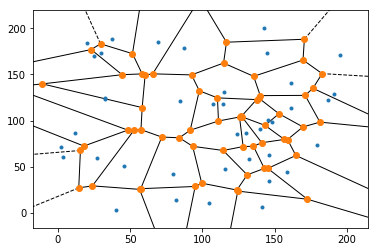

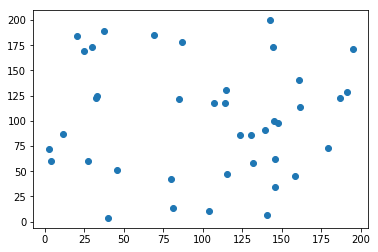

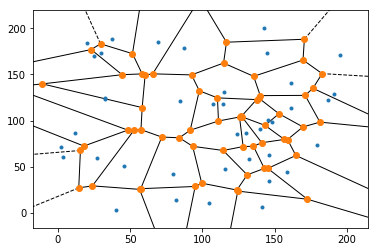

In [22]:
import matplotlib.pyplot as plt
Ngrains = 40
r = np.random.uniform(0, nx*d, (Ngrains, 2))

plt.scatter(r[:, 0], r[:, 1])

from scipy.spatial import Voronoi, voronoi_plot_2d

vor = Voronoi(r)
voronoi_plot_2d(vor)

In [35]:
from scipy.spatial import cKDTree
from fidimag.micro import UniaxialAnisotropy

Ngrains = 20
voronoi_kdtree = cKDTree(r)
Ku = 1e5
axes = np.random.uniform(-1, 1, (Ngrains, 3))
axes /= np.linalg.norm(axes)
strengths = np.random.uniform(0.9, 1.1, Ngrains) * Ku


def K_axis(pos):
    x, y, z = pos
    _, test_point_regions = voronoi_kdtree.query(np.array([[x, y]]), k=1)
    region = test_point_regions[0]
    return axes[region]

def K_mag(pos):
    x, y, z = pos
    _, test_point_regions = voronoi_kdtree.query(np.array([[x, y]]), k=1)
    region = test_point_regions[0]
    return strengths[region]






In [36]:
anis = UniaxialAnisotropy?

In [37]:
anis = UniaxialAnisotropy(K_mag, K_axis)

In [50]:
x = y = np.linspace(0, )

<function __main__.K_axis(pos)>